In [1]:
# load packages

import os
import pandas as pd
from qsprpred.data import QSPRDataset
from sklearn.impute import SimpleImputer
from qsprpred.data import QSPRDataset, RandomSplit
from qsprpred.data.descriptors.fingerprints import MorganFP
from qsprpred.data.descriptors.sets import SmilesDesc
from qsprpred.data.sampling.splits import GBMTRandomSplit, GBMTDataSplit, ManualSplit
from split import random_global_equilibrated_random_split, dissimilaritydrive_global_balanced_cluster_split
from qsprpred.extra.gpu.models.chemprop import ChempropModel
from qsprpred.models import CrossValAssessor, TestSetAssessor
from qsprpred.models.early_stopping import EarlyStoppingMode
from qsprpred.models import SklearnModel
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
# from qsprpred.plotting.regression import CorrelationPlot
from plotting_regression_MT import CorrelationPlot

Failed to find the pandas get_adjustment() function to patch
Failed to patch pandas - PandasTools will have limited functionality


In [2]:
df=pd.read_csv('/home/s2861704/ppk/test_kin/output/TK/TK_split.csv', sep=',')
display(df)
print(df.columns)

,SMILES,O60674,P00519,P00533,P04626,P04629,P06213,P06239,P07333,P07949,...,Q06187,Q06418,Q07912,Q08345,Q08881,Q12866,Q16288,Q16620,Q16832,split
0,BrC(Cn1ncc2c(N3CCCC3)ncnc21)c1ccccc1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,train
1,BrC(Cn1ncc2c(N3CCCCC3)ncnc21)c1ccccc1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,train
2,BrC(Cn1ncc2c(NCc3ccccc3)ncnc21)c1ccccc1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,train
3,Brc1cc(CNc2ncc(Br)c(Nc3cc(C4CC4)[nH]n3)n2)on1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,train
4,Brc1cc2c(NCc3ccccc3)ncnc2s1,NaN,NaN,6.62,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36999,c1nc2c(Nc3ccc(N4CCOCC4)cc3)nc(-c3ccc4c[nH]nc4c...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,train
37000,c1nc2c(Nc3ccc(N4CCOCC4)cc3)nc(-c3ccc4c[nH]nc4c...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,train
37001,c1ncc(-c2cc(CNc3nc(Nc4cc(C5CC5)[nH]n4)cc(N4CCO...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,train
37002,c1ncc(CN2CCC(n3cnc4cnc5[nH]ccc5c43)CC2)cn1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,train


Index(['SMILES', 'O60674', 'P00519', 'P00533', 'P04626', 'P04629', 'P06213',
       'P06239', 'P07333', 'P07949', 'P08069', 'P08581', 'P09581', 'P09619',
       'P10721', 'P11362', 'P12931', 'P16234', 'P17948', 'P21802', 'P22455',
       'P22607', 'P23458', 'P29317', 'P29597', 'P30530', 'P35968', 'P36888',
       'P43405', 'P52333', 'P54760', 'Q02763', 'Q05397', 'Q06187', 'Q06418',
       'Q07912', 'Q08345', 'Q08881', 'Q12866', 'Q16288', 'Q16620', 'Q16832',
       'split'],
      dtype='object')


In [3]:
targets_kinase200 = df.columns[1:42].tolist()
display(targets_kinase200)

['O60674',
 'P00519',
 'P00533',
 'P04626',
 'P04629',
 'P06213',
 'P06239',
 'P07333',
 'P07949',
 'P08069',
 'P08581',
 'P09581',
 'P09619',
 'P10721',
 'P11362',
 'P12931',
 'P16234',
 'P17948',
 'P21802',
 'P22455',
 'P22607',
 'P23458',
 'P29317',
 'P29597',
 'P30530',
 'P35968',
 'P36888',
 'P43405',
 'P52333',
 'P54760',
 'Q02763',
 'Q05397',
 'Q06187',
 'Q06418',
 'Q07912',
 'Q08345',
 'Q08881',
 'Q12866',
 'Q16288',
 'Q16620',
 'Q16832']

O60674
                                                  SMILES  O60674  split
0                   BrC(Cn1ncc2c(N3CCCC3)ncnc21)c1ccccc1     NaN  train
1                  BrC(Cn1ncc2c(N3CCCCC3)ncnc21)c1ccccc1     NaN  train
2                BrC(Cn1ncc2c(NCc3ccccc3)ncnc21)c1ccccc1     NaN  train
3          Brc1cc(CNc2ncc(Br)c(Nc3cc(C4CC4)[nH]n3)n2)on1     NaN  train
4                            Brc1cc2c(NCc3ccccc3)ncnc2s1     NaN  train
...                                                  ...     ...    ...
36999  c1nc2c(Nc3ccc(N4CCOCC4)cc3)nc(-c3ccc4c[nH]nc4c...     NaN  train
37000  c1nc2c(Nc3ccc(N4CCOCC4)cc3)nc(-c3ccc4c[nH]nc4c...     NaN  train
37001  c1ncc(-c2cc(CNc3nc(Nc4cc(C5CC5)[nH]n4)cc(N4CCO...     NaN  train
37002         c1ncc(CN2CCC(n3cnc4cnc5[nH]ccc5c43)CC2)cn1     NaN  train
37003                            c1nnc2nnc(N3CCOCC3)nn12     NaN  train

[37004 rows x 3 columns]
                                                  SMILES     O60674  split
221    C#CCN1CCc2cc(Nc3ncc(C

/home/s2861704/.conda/envs/drugex_env/lib/python3.12/site-packages/qsprpred/data/tables/pandas.py:261: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df[name] = generate_padded_index(self.df.index, prefix=prefix)
/home/s2861704/.conda/envs/drugex_env/lib/python3.12/site-packages/qsprpred/data/tables/pandas.py:242: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df[self.idProp] = self.df[self.indexCols].apply(
/home/s2861704/.conda/envs/drugex_env/lib/python3.12/site-packages/qsprpred/data/tables/pand

Number of samples in train set: 2536
Number of samples in test set: 625
QSPRModel_O60674
                 Model                   QSPRID              Fold Property  \
0     QSPRModel_O60674  QSPRDataset_O60674_0000               3.0   O60674   
1     QSPRModel_O60674  QSPRDataset_O60674_0002               4.0   O60674   
2     QSPRModel_O60674  QSPRDataset_O60674_0003               2.0   O60674   
3     QSPRModel_O60674  QSPRDataset_O60674_0005               3.0   O60674   
4     QSPRModel_O60674  QSPRDataset_O60674_0006               4.0   O60674   
...                ...                      ...               ...      ...   
3156  QSPRModel_O60674  QSPRDataset_O60674_3151  Independent Test   O60674   
3157  QSPRModel_O60674  QSPRDataset_O60674_3152  Independent Test   O60674   
3158  QSPRModel_O60674  QSPRDataset_O60674_3154  Independent Test   O60674   
3159  QSPRModel_O60674  QSPRDataset_O60674_3155  Independent Test   O60674   
3160  QSPRModel_O60674  QSPRDataset_O60674_3158  Inde

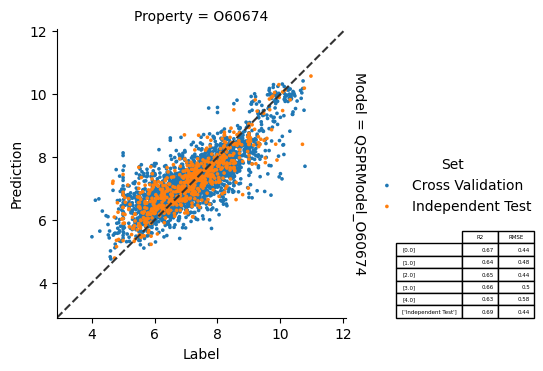

P00519
                                                  SMILES  P00519  split
0                   BrC(Cn1ncc2c(N3CCCC3)ncnc21)c1ccccc1     NaN  train
1                  BrC(Cn1ncc2c(N3CCCCC3)ncnc21)c1ccccc1     NaN  train
2                BrC(Cn1ncc2c(NCc3ccccc3)ncnc21)c1ccccc1     NaN  train
3          Brc1cc(CNc2ncc(Br)c(Nc3cc(C4CC4)[nH]n3)n2)on1     NaN  train
4                            Brc1cc2c(NCc3ccccc3)ncnc2s1     NaN  train
...                                                  ...     ...    ...
36999  c1nc2c(Nc3ccc(N4CCOCC4)cc3)nc(-c3ccc4c[nH]nc4c...     NaN  train
37000  c1nc2c(Nc3ccc(N4CCOCC4)cc3)nc(-c3ccc4c[nH]nc4c...     NaN  train
37001  c1ncc(-c2cc(CNc3nc(Nc4cc(C5CC5)[nH]n4)cc(N4CCO...     NaN  train
37002         c1ncc(CN2CCC(n3cnc4cnc5[nH]ccc5c43)CC2)cn1     NaN  train
37003                            c1nnc2nnc(N3CCOCC3)nn12     NaN  train

[37004 rows x 3 columns]
                                                  SMILES   P00519  split
228    C#CCOC1C(C)C(COC(=O)c2c

/home/s2861704/.conda/envs/drugex_env/lib/python3.12/site-packages/qsprpred/data/tables/pandas.py:261: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df[name] = generate_padded_index(self.df.index, prefix=prefix)
/home/s2861704/.conda/envs/drugex_env/lib/python3.12/site-packages/qsprpred/data/tables/pandas.py:242: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df[self.idProp] = self.df[self.indexCols].apply(
/home/s2861704/.conda/envs/drugex_env/lib/python3.12/site-packages/qsprpred/data/tables/pand

Number of samples in train set: 934
Number of samples in test set: 228
QSPRModel_P00519
                 Model                   QSPRID              Fold Property  \
0     QSPRModel_P00519  QSPRDataset_P00519_0000               2.0   P00519   
1     QSPRModel_P00519  QSPRDataset_P00519_0001               4.0   P00519   
2     QSPRModel_P00519  QSPRDataset_P00519_0004               0.0   P00519   
3     QSPRModel_P00519  QSPRDataset_P00519_0005               2.0   P00519   
4     QSPRModel_P00519  QSPRDataset_P00519_0006               4.0   P00519   
...                ...                      ...               ...      ...   
1157  QSPRModel_P00519  QSPRDataset_P00519_1149  Independent Test   P00519   
1158  QSPRModel_P00519  QSPRDataset_P00519_1151  Independent Test   P00519   
1159  QSPRModel_P00519  QSPRDataset_P00519_1153  Independent Test   P00519   
1160  QSPRModel_P00519  QSPRDataset_P00519_1159  Independent Test   P00519   
1161  QSPRModel_P00519  QSPRDataset_P00519_1161  Indep

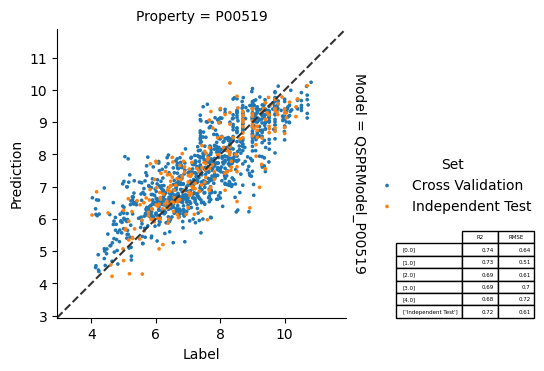

P00533
                                                  SMILES  P00533  split
0                   BrC(Cn1ncc2c(N3CCCC3)ncnc21)c1ccccc1     NaN  train
1                  BrC(Cn1ncc2c(N3CCCCC3)ncnc21)c1ccccc1     NaN  train
2                BrC(Cn1ncc2c(NCc3ccccc3)ncnc21)c1ccccc1     NaN  train
3          Brc1cc(CNc2ncc(Br)c(Nc3cc(C4CC4)[nH]n3)n2)on1     NaN  train
4                            Brc1cc2c(NCc3ccccc3)ncnc2s1    6.62  train
...                                                  ...     ...    ...
36999  c1nc2c(Nc3ccc(N4CCOCC4)cc3)nc(-c3ccc4c[nH]nc4c...     NaN  train
37000  c1nc2c(Nc3ccc(N4CCOCC4)cc3)nc(-c3ccc4c[nH]nc4c...     NaN  train
37001  c1ncc(-c2cc(CNc3nc(Nc4cc(C5CC5)[nH]n4)cc(N4CCO...     NaN  train
37002         c1ncc(CN2CCC(n3cnc4cnc5[nH]ccc5c43)CC2)cn1     NaN  train
37003                            c1nnc2nnc(N3CCOCC3)nn12     NaN  train

[37004 rows x 3 columns]
                                                  SMILES  P00533  split
4                            Br

/home/s2861704/.conda/envs/drugex_env/lib/python3.12/site-packages/qsprpred/data/tables/pandas.py:261: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df[name] = generate_padded_index(self.df.index, prefix=prefix)
/home/s2861704/.conda/envs/drugex_env/lib/python3.12/site-packages/qsprpred/data/tables/pandas.py:242: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df[self.idProp] = self.df[self.indexCols].apply(
/home/s2861704/.conda/envs/drugex_env/lib/python3.12/site-packages/qsprpred/data/tables/pand

Number of samples in train set: 7573
Number of samples in test set: 1875
QSPRModel_P00533
                 Model                   QSPRID              Fold Property  \
0     QSPRModel_P00533  QSPRDataset_P00533_0000               0.0   P00533   
1     QSPRModel_P00533  QSPRDataset_P00533_0001               3.0   P00533   
2     QSPRModel_P00533  QSPRDataset_P00533_0002               3.0   P00533   
3     QSPRModel_P00533  QSPRDataset_P00533_0003               4.0   P00533   
4     QSPRModel_P00533  QSPRDataset_P00533_0005               4.0   P00533   
...                ...                      ...               ...      ...   
9443  QSPRModel_P00533  QSPRDataset_P00533_9391  Independent Test   P00533   
9444  QSPRModel_P00533  QSPRDataset_P00533_9399  Independent Test   P00533   
9445  QSPRModel_P00533  QSPRDataset_P00533_9404  Independent Test   P00533   
9446  QSPRModel_P00533  QSPRDataset_P00533_9435  Independent Test   P00533   
9447  QSPRModel_P00533  QSPRDataset_P00533_9436  Ind

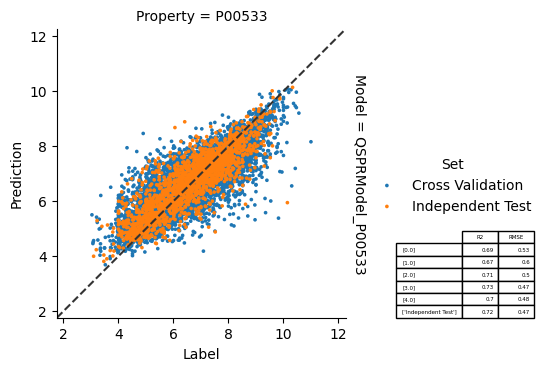

P04626
                                                  SMILES  P04626  split
0                   BrC(Cn1ncc2c(N3CCCC3)ncnc21)c1ccccc1     NaN  train
1                  BrC(Cn1ncc2c(N3CCCCC3)ncnc21)c1ccccc1     NaN  train
2                BrC(Cn1ncc2c(NCc3ccccc3)ncnc21)c1ccccc1     NaN  train
3          Brc1cc(CNc2ncc(Br)c(Nc3cc(C4CC4)[nH]n3)n2)on1     NaN  train
4                            Brc1cc2c(NCc3ccccc3)ncnc2s1     NaN  train
...                                                  ...     ...    ...
36999  c1nc2c(Nc3ccc(N4CCOCC4)cc3)nc(-c3ccc4c[nH]nc4c...     NaN  train
37000  c1nc2c(Nc3ccc(N4CCOCC4)cc3)nc(-c3ccc4c[nH]nc4c...     NaN  train
37001  c1ncc(-c2cc(CNc3nc(Nc4cc(C5CC5)[nH]n4)cc(N4CCO...     NaN  train
37002         c1ncc(CN2CCC(n3cnc4cnc5[nH]ccc5c43)CC2)cn1     NaN  train
37003                            c1nnc2nnc(N3CCOCC3)nn12     NaN  train

[37004 rows x 3 columns]
                                                  SMILES  P04626  split
15        Brc1ccc(C2=NN(c3ccccc

/home/s2861704/.conda/envs/drugex_env/lib/python3.12/site-packages/qsprpred/data/tables/pandas.py:261: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df[name] = generate_padded_index(self.df.index, prefix=prefix)
/home/s2861704/.conda/envs/drugex_env/lib/python3.12/site-packages/qsprpred/data/tables/pandas.py:242: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df[self.idProp] = self.df[self.indexCols].apply(
/home/s2861704/.conda/envs/drugex_env/lib/python3.12/site-packages/qsprpred/data/tables/pand

Number of samples in train set: 1122
Number of samples in test set: 268
QSPRModel_P04626
                 Model                   QSPRID              Fold Property  \
0     QSPRModel_P04626  QSPRDataset_P04626_0000               2.0   P04626   
1     QSPRModel_P04626  QSPRDataset_P04626_0003               4.0   P04626   
2     QSPRModel_P04626  QSPRDataset_P04626_0004               1.0   P04626   
3     QSPRModel_P04626  QSPRDataset_P04626_0005               0.0   P04626   
4     QSPRModel_P04626  QSPRDataset_P04626_0006               3.0   P04626   
...                ...                      ...               ...      ...   
1385  QSPRModel_P04626  QSPRDataset_P04626_1359  Independent Test   P04626   
1386  QSPRModel_P04626  QSPRDataset_P04626_1360  Independent Test   P04626   
1387  QSPRModel_P04626  QSPRDataset_P04626_1376  Independent Test   P04626   
1388  QSPRModel_P04626  QSPRDataset_P04626_1377  Independent Test   P04626   
1389  QSPRModel_P04626  QSPRDataset_P04626_1388  Inde

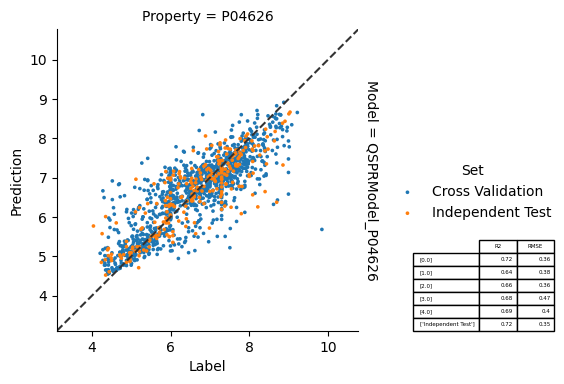

P04629
                                                  SMILES  P04629  split
0                   BrC(Cn1ncc2c(N3CCCC3)ncnc21)c1ccccc1     NaN  train
1                  BrC(Cn1ncc2c(N3CCCCC3)ncnc21)c1ccccc1     NaN  train
2                BrC(Cn1ncc2c(NCc3ccccc3)ncnc21)c1ccccc1     NaN  train
3          Brc1cc(CNc2ncc(Br)c(Nc3cc(C4CC4)[nH]n3)n2)on1     NaN  train
4                            Brc1cc2c(NCc3ccccc3)ncnc2s1     NaN  train
...                                                  ...     ...    ...
36999  c1nc2c(Nc3ccc(N4CCOCC4)cc3)nc(-c3ccc4c[nH]nc4c...     NaN  train
37000  c1nc2c(Nc3ccc(N4CCOCC4)cc3)nc(-c3ccc4c[nH]nc4c...     NaN  train
37001  c1ncc(-c2cc(CNc3nc(Nc4cc(C5CC5)[nH]n4)cc(N4CCO...     NaN  train
37002         c1ncc(CN2CCC(n3cnc4cnc5[nH]ccc5c43)CC2)cn1     NaN  train
37003                            c1nnc2nnc(N3CCOCC3)nn12     NaN  train

[37004 rows x 3 columns]
                                                  SMILES  P04629  split
121             Brc1cnc(NCc2ccc

/home/s2861704/.conda/envs/drugex_env/lib/python3.12/site-packages/qsprpred/data/tables/pandas.py:261: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df[name] = generate_padded_index(self.df.index, prefix=prefix)
/home/s2861704/.conda/envs/drugex_env/lib/python3.12/site-packages/qsprpred/data/tables/pandas.py:242: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df[self.idProp] = self.df[self.indexCols].apply(
/home/s2861704/.conda/envs/drugex_env/lib/python3.12/site-packages/qsprpred/data/tables/pand

Number of samples in train set: 764
Number of samples in test set: 194
QSPRModel_P04629
                Model                  QSPRID              Fold Property  \
0    QSPRModel_P04629  QSPRDataset_P04629_000               2.0   P04629   
1    QSPRModel_P04629  QSPRDataset_P04629_002               4.0   P04629   
2    QSPRModel_P04629  QSPRDataset_P04629_004               0.0   P04629   
3    QSPRModel_P04629  QSPRDataset_P04629_005               3.0   P04629   
4    QSPRModel_P04629  QSPRDataset_P04629_008               4.0   P04629   
..                ...                     ...               ...      ...   
953  QSPRModel_P04629  QSPRDataset_P04629_935  Independent Test   P04629   
954  QSPRModel_P04629  QSPRDataset_P04629_939  Independent Test   P04629   
955  QSPRModel_P04629  QSPRDataset_P04629_946  Independent Test   P04629   
956  QSPRModel_P04629  QSPRDataset_P04629_950  Independent Test   P04629   
957  QSPRModel_P04629  QSPRDataset_P04629_952  Independent Test   P04629   


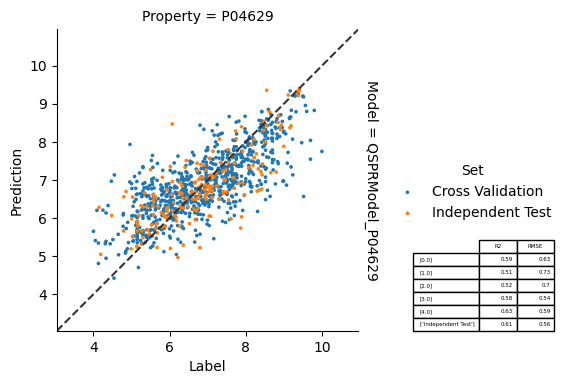

P06213
                                                  SMILES  P06213  split
0                   BrC(Cn1ncc2c(N3CCCC3)ncnc21)c1ccccc1     NaN  train
1                  BrC(Cn1ncc2c(N3CCCCC3)ncnc21)c1ccccc1     NaN  train
2                BrC(Cn1ncc2c(NCc3ccccc3)ncnc21)c1ccccc1     NaN  train
3          Brc1cc(CNc2ncc(Br)c(Nc3cc(C4CC4)[nH]n3)n2)on1     NaN  train
4                            Brc1cc2c(NCc3ccccc3)ncnc2s1     NaN  train
...                                                  ...     ...    ...
36999  c1nc2c(Nc3ccc(N4CCOCC4)cc3)nc(-c3ccc4c[nH]nc4c...     NaN  train
37000  c1nc2c(Nc3ccc(N4CCOCC4)cc3)nc(-c3ccc4c[nH]nc4c...     NaN  train
37001  c1ncc(-c2cc(CNc3nc(Nc4cc(C5CC5)[nH]n4)cc(N4CCO...     NaN  train
37002         c1ncc(CN2CCC(n3cnc4cnc5[nH]ccc5c43)CC2)cn1     NaN  train
37003                            c1nnc2nnc(N3CCOCC3)nn12     NaN  train

[37004 rows x 3 columns]
                                                  SMILES  P06213  split
376    C#Cc1cccc(Nc2ncnc3ccc(OC

/home/s2861704/.conda/envs/drugex_env/lib/python3.12/site-packages/qsprpred/data/tables/pandas.py:261: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df[name] = generate_padded_index(self.df.index, prefix=prefix)
/home/s2861704/.conda/envs/drugex_env/lib/python3.12/site-packages/qsprpred/data/tables/pandas.py:242: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df[self.idProp] = self.df[self.indexCols].apply(
/home/s2861704/.conda/envs/drugex_env/lib/python3.12/site-packages/qsprpred/data/tables/pand

Number of samples in train set: 247
Number of samples in test set: 62
QSPRModel_P06213
                Model                  QSPRID              Fold Property  \
0    QSPRModel_P06213  QSPRDataset_P06213_001               2.0   P06213   
1    QSPRModel_P06213  QSPRDataset_P06213_002               4.0   P06213   
2    QSPRModel_P06213  QSPRDataset_P06213_003               2.0   P06213   
3    QSPRModel_P06213  QSPRDataset_P06213_004               3.0   P06213   
4    QSPRModel_P06213  QSPRDataset_P06213_005               2.0   P06213   
..                ...                     ...               ...      ...   
304  QSPRModel_P06213  QSPRDataset_P06213_292  Independent Test   P06213   
305  QSPRModel_P06213  QSPRDataset_P06213_294  Independent Test   P06213   
306  QSPRModel_P06213  QSPRDataset_P06213_302  Independent Test   P06213   
307  QSPRModel_P06213  QSPRDataset_P06213_303  Independent Test   P06213   
308  QSPRModel_P06213  QSPRDataset_P06213_305  Independent Test   P06213   



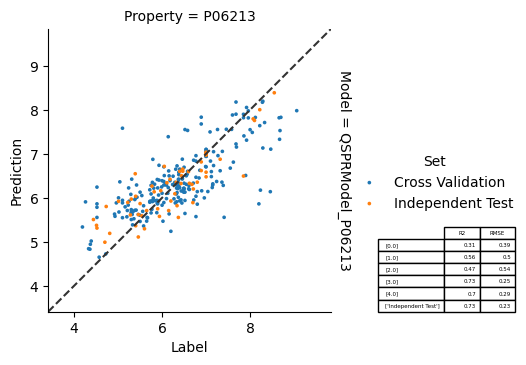

P06239
                                                  SMILES  P06239  split
0                   BrC(Cn1ncc2c(N3CCCC3)ncnc21)c1ccccc1     NaN  train
1                  BrC(Cn1ncc2c(N3CCCCC3)ncnc21)c1ccccc1     NaN  train
2                BrC(Cn1ncc2c(NCc3ccccc3)ncnc21)c1ccccc1     NaN  train
3          Brc1cc(CNc2ncc(Br)c(Nc3cc(C4CC4)[nH]n3)n2)on1     NaN  train
4                            Brc1cc2c(NCc3ccccc3)ncnc2s1     NaN  train
...                                                  ...     ...    ...
36999  c1nc2c(Nc3ccc(N4CCOCC4)cc3)nc(-c3ccc4c[nH]nc4c...     NaN  train
37000  c1nc2c(Nc3ccc(N4CCOCC4)cc3)nc(-c3ccc4c[nH]nc4c...     NaN  train
37001  c1ncc(-c2cc(CNc3nc(Nc4cc(C5CC5)[nH]n4)cc(N4CCO...     NaN  train
37002         c1ncc(CN2CCC(n3cnc4cnc5[nH]ccc5c43)CC2)cn1     NaN  train
37003                            c1nnc2nnc(N3CCOCC3)nn12     NaN  train

[37004 rows x 3 columns]
                                                  SMILES  P06239  split
410                       C#Cc1

/home/s2861704/.conda/envs/drugex_env/lib/python3.12/site-packages/qsprpred/data/tables/pandas.py:261: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df[name] = generate_padded_index(self.df.index, prefix=prefix)
/home/s2861704/.conda/envs/drugex_env/lib/python3.12/site-packages/qsprpred/data/tables/pandas.py:242: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df[self.idProp] = self.df[self.indexCols].apply(
/home/s2861704/.conda/envs/drugex_env/lib/python3.12/site-packages/qsprpred/data/tables/pand

Number of samples in train set: 576
Number of samples in test set: 141
QSPRModel_P06239
                Model                  QSPRID              Fold Property  \
0    QSPRModel_P06239  QSPRDataset_P06239_000               1.0   P06239   
1    QSPRModel_P06239  QSPRDataset_P06239_002               4.0   P06239   
2    QSPRModel_P06239  QSPRDataset_P06239_003               0.0   P06239   
3    QSPRModel_P06239  QSPRDataset_P06239_004               2.0   P06239   
4    QSPRModel_P06239  QSPRDataset_P06239_008               3.0   P06239   
..                ...                     ...               ...      ...   
712  QSPRModel_P06239  QSPRDataset_P06239_695  Independent Test   P06239   
713  QSPRModel_P06239  QSPRDataset_P06239_698  Independent Test   P06239   
714  QSPRModel_P06239  QSPRDataset_P06239_700  Independent Test   P06239   
715  QSPRModel_P06239  QSPRDataset_P06239_701  Independent Test   P06239   
716  QSPRModel_P06239  QSPRDataset_P06239_716  Independent Test   P06239   


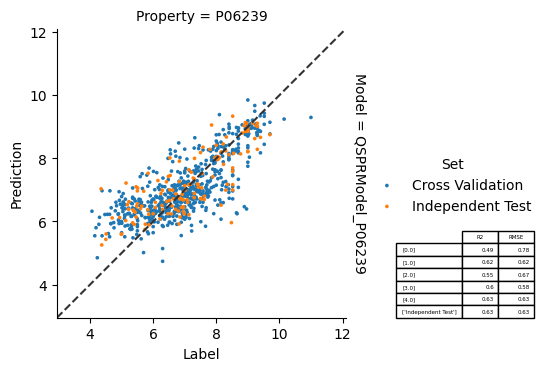

P07333
                                                  SMILES  P07333  split
0                   BrC(Cn1ncc2c(N3CCCC3)ncnc21)c1ccccc1     NaN  train
1                  BrC(Cn1ncc2c(N3CCCCC3)ncnc21)c1ccccc1     NaN  train
2                BrC(Cn1ncc2c(NCc3ccccc3)ncnc21)c1ccccc1     NaN  train
3          Brc1cc(CNc2ncc(Br)c(Nc3cc(C4CC4)[nH]n3)n2)on1     NaN  train
4                            Brc1cc2c(NCc3ccccc3)ncnc2s1     NaN  train
...                                                  ...     ...    ...
36999  c1nc2c(Nc3ccc(N4CCOCC4)cc3)nc(-c3ccc4c[nH]nc4c...     NaN  train
37000  c1nc2c(Nc3ccc(N4CCOCC4)cc3)nc(-c3ccc4c[nH]nc4c...     NaN  train
37001  c1ncc(-c2cc(CNc3nc(Nc4cc(C5CC5)[nH]n4)cc(N4CCO...     NaN  train
37002         c1ncc(CN2CCC(n3cnc4cnc5[nH]ccc5c43)CC2)cn1     NaN  train
37003                            c1nnc2nnc(N3CCOCC3)nn12     NaN  train

[37004 rows x 3 columns]
                                                  SMILES  P07333  split
240        C#CCn1nc(Br)c2c(NC(=

/home/s2861704/.conda/envs/drugex_env/lib/python3.12/site-packages/qsprpred/data/tables/pandas.py:261: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df[name] = generate_padded_index(self.df.index, prefix=prefix)
/home/s2861704/.conda/envs/drugex_env/lib/python3.12/site-packages/qsprpred/data/tables/pandas.py:242: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df[self.idProp] = self.df[self.indexCols].apply(
/home/s2861704/.conda/envs/drugex_env/lib/python3.12/site-packages/qsprpred/data/tables/pand

Number of samples in train set: 780
Number of samples in test set: 190
QSPRModel_P07333
                Model                  QSPRID              Fold Property  \
0    QSPRModel_P07333  QSPRDataset_P07333_000               2.0   P07333   
1    QSPRModel_P07333  QSPRDataset_P07333_002               4.0   P07333   
2    QSPRModel_P07333  QSPRDataset_P07333_003               0.0   P07333   
3    QSPRModel_P07333  QSPRDataset_P07333_005               3.0   P07333   
4    QSPRModel_P07333  QSPRDataset_P07333_008               4.0   P07333   
..                ...                     ...               ...      ...   
965  QSPRModel_P07333  QSPRDataset_P07333_936  Independent Test   P07333   
966  QSPRModel_P07333  QSPRDataset_P07333_938  Independent Test   P07333   
967  QSPRModel_P07333  QSPRDataset_P07333_942  Independent Test   P07333   
968  QSPRModel_P07333  QSPRDataset_P07333_959  Independent Test   P07333   
969  QSPRModel_P07333  QSPRDataset_P07333_964  Independent Test   P07333   


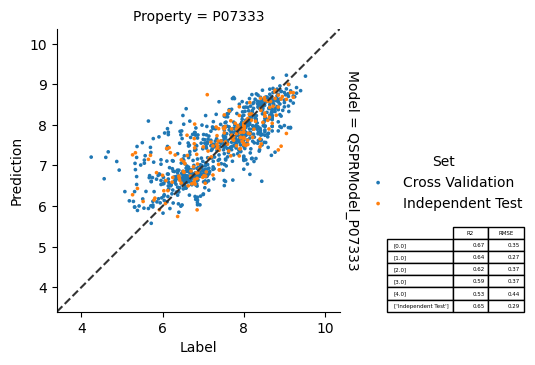

P07949
                                                  SMILES  P07949  split
0                   BrC(Cn1ncc2c(N3CCCC3)ncnc21)c1ccccc1     NaN  train
1                  BrC(Cn1ncc2c(N3CCCCC3)ncnc21)c1ccccc1     NaN  train
2                BrC(Cn1ncc2c(NCc3ccccc3)ncnc21)c1ccccc1     NaN  train
3          Brc1cc(CNc2ncc(Br)c(Nc3cc(C4CC4)[nH]n3)n2)on1     NaN  train
4                            Brc1cc2c(NCc3ccccc3)ncnc2s1     NaN  train
...                                                  ...     ...    ...
36999  c1nc2c(Nc3ccc(N4CCOCC4)cc3)nc(-c3ccc4c[nH]nc4c...     NaN  train
37000  c1nc2c(Nc3ccc(N4CCOCC4)cc3)nc(-c3ccc4c[nH]nc4c...     NaN  train
37001  c1ncc(-c2cc(CNc3nc(Nc4cc(C5CC5)[nH]n4)cc(N4CCO...     NaN  train
37002         c1ncc(CN2CCC(n3cnc4cnc5[nH]ccc5c43)CC2)cn1     NaN  train
37003                            c1nnc2nnc(N3CCOCC3)nn12     NaN  train

[37004 rows x 3 columns]
                                                  SMILES  P07949  split
814    C=CC(=O)N1CCC(Cn2cc(-c3c

/home/s2861704/.conda/envs/drugex_env/lib/python3.12/site-packages/qsprpred/data/tables/pandas.py:261: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df[name] = generate_padded_index(self.df.index, prefix=prefix)
/home/s2861704/.conda/envs/drugex_env/lib/python3.12/site-packages/qsprpred/data/tables/pandas.py:242: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df[self.idProp] = self.df[self.indexCols].apply(
/home/s2861704/.conda/envs/drugex_env/lib/python3.12/site-packages/qsprpred/data/tables/pand

Number of samples in train set: 497
Number of samples in test set: 121
QSPRModel_P07949
                Model                  QSPRID              Fold Property  \
0    QSPRModel_P07949  QSPRDataset_P07949_000               0.0   P07949   
1    QSPRModel_P07949  QSPRDataset_P07949_001               4.0   P07949   
2    QSPRModel_P07949  QSPRDataset_P07949_002               0.0   P07949   
3    QSPRModel_P07949  QSPRDataset_P07949_005               1.0   P07949   
4    QSPRModel_P07949  QSPRDataset_P07949_006               3.0   P07949   
..                ...                     ...               ...      ...   
613  QSPRModel_P07949  QSPRDataset_P07949_590  Independent Test   P07949   
614  QSPRModel_P07949  QSPRDataset_P07949_603  Independent Test   P07949   
615  QSPRModel_P07949  QSPRDataset_P07949_604  Independent Test   P07949   
616  QSPRModel_P07949  QSPRDataset_P07949_611  Independent Test   P07949   
617  QSPRModel_P07949  QSPRDataset_P07949_616  Independent Test   P07949   


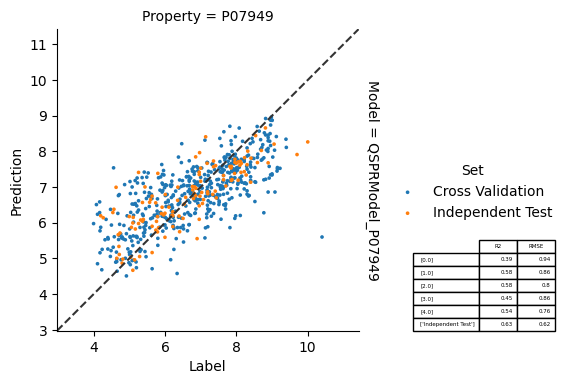

P08069
                                                  SMILES  P08069  split
0                   BrC(Cn1ncc2c(N3CCCC3)ncnc21)c1ccccc1     NaN  train
1                  BrC(Cn1ncc2c(N3CCCCC3)ncnc21)c1ccccc1     NaN  train
2                BrC(Cn1ncc2c(NCc3ccccc3)ncnc21)c1ccccc1     NaN  train
3          Brc1cc(CNc2ncc(Br)c(Nc3cc(C4CC4)[nH]n3)n2)on1     6.8  train
4                            Brc1cc2c(NCc3ccccc3)ncnc2s1     NaN  train
...                                                  ...     ...    ...
36999  c1nc2c(Nc3ccc(N4CCOCC4)cc3)nc(-c3ccc4c[nH]nc4c...     NaN  train
37000  c1nc2c(Nc3ccc(N4CCOCC4)cc3)nc(-c3ccc4c[nH]nc4c...     NaN  train
37001  c1ncc(-c2cc(CNc3nc(Nc4cc(C5CC5)[nH]n4)cc(N4CCO...     7.3  train
37002         c1ncc(CN2CCC(n3cnc4cnc5[nH]ccc5c43)CC2)cn1     NaN  train
37003                            c1nnc2nnc(N3CCOCC3)nn12     NaN  train

[37004 rows x 3 columns]
                                                  SMILES  P08069  split
3          Brc1cc(CNc2ncc(Br)c(

/home/s2861704/.conda/envs/drugex_env/lib/python3.12/site-packages/qsprpred/data/tables/pandas.py:261: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df[name] = generate_padded_index(self.df.index, prefix=prefix)
/home/s2861704/.conda/envs/drugex_env/lib/python3.12/site-packages/qsprpred/data/tables/pandas.py:242: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df[self.idProp] = self.df[self.indexCols].apply(
/home/s2861704/.conda/envs/drugex_env/lib/python3.12/site-packages/qsprpred/data/tables/pand

Number of samples in train set: 1301
Number of samples in test set: 319
QSPRModel_P08069
                 Model                   QSPRID              Fold Property  \
0     QSPRModel_P08069  QSPRDataset_P08069_0000               2.0   P08069   
1     QSPRModel_P08069  QSPRDataset_P08069_0001               4.0   P08069   
2     QSPRModel_P08069  QSPRDataset_P08069_0002               1.0   P08069   
3     QSPRModel_P08069  QSPRDataset_P08069_0003               1.0   P08069   
4     QSPRModel_P08069  QSPRDataset_P08069_0005               3.0   P08069   
...                ...                      ...               ...      ...   
1615  QSPRModel_P08069  QSPRDataset_P08069_1605  Independent Test   P08069   
1616  QSPRModel_P08069  QSPRDataset_P08069_1606  Independent Test   P08069   
1617  QSPRModel_P08069  QSPRDataset_P08069_1608  Independent Test   P08069   
1618  QSPRModel_P08069  QSPRDataset_P08069_1613  Independent Test   P08069   
1619  QSPRModel_P08069  QSPRDataset_P08069_1617  Inde

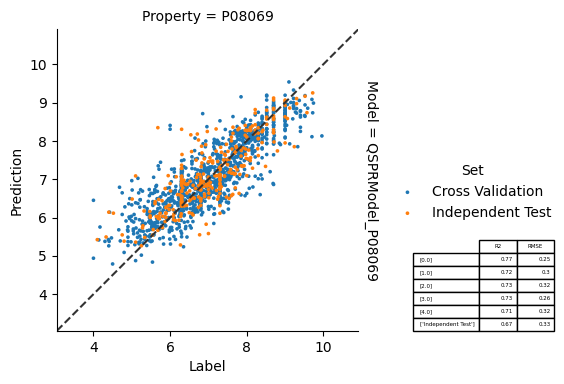

P08581
                                                  SMILES  P08581  split
0                   BrC(Cn1ncc2c(N3CCCC3)ncnc21)c1ccccc1     NaN  train
1                  BrC(Cn1ncc2c(N3CCCCC3)ncnc21)c1ccccc1     NaN  train
2                BrC(Cn1ncc2c(NCc3ccccc3)ncnc21)c1ccccc1     NaN  train
3          Brc1cc(CNc2ncc(Br)c(Nc3cc(C4CC4)[nH]n3)n2)on1     NaN  train
4                            Brc1cc2c(NCc3ccccc3)ncnc2s1     NaN  train
...                                                  ...     ...    ...
36999  c1nc2c(Nc3ccc(N4CCOCC4)cc3)nc(-c3ccc4c[nH]nc4c...     NaN  train
37000  c1nc2c(Nc3ccc(N4CCOCC4)cc3)nc(-c3ccc4c[nH]nc4c...     NaN  train
37001  c1ncc(-c2cc(CNc3nc(Nc4cc(C5CC5)[nH]n4)cc(N4CCO...     NaN  train
37002         c1ncc(CN2CCC(n3cnc4cnc5[nH]ccc5c43)CC2)cn1     NaN  train
37003                            c1nnc2nnc(N3CCOCC3)nn12    4.93  train

[37004 rows x 3 columns]
                                                  SMILES  P08581  split
9          Brc1ccc(-c2cnc3nnc(C

/home/s2861704/.conda/envs/drugex_env/lib/python3.12/site-packages/qsprpred/data/tables/pandas.py:261: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df[name] = generate_padded_index(self.df.index, prefix=prefix)
/home/s2861704/.conda/envs/drugex_env/lib/python3.12/site-packages/qsprpred/data/tables/pandas.py:242: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df[self.idProp] = self.df[self.indexCols].apply(
/home/s2861704/.conda/envs/drugex_env/lib/python3.12/site-packages/qsprpred/data/tables/pand

Number of samples in train set: 2346
Number of samples in test set: 569
QSPRModel_P08581
                 Model                   QSPRID              Fold Property  \
0     QSPRModel_P08581  QSPRDataset_P08581_0001               3.0   P08581   
1     QSPRModel_P08581  QSPRDataset_P08581_0002               4.0   P08581   
2     QSPRModel_P08581  QSPRDataset_P08581_0003               1.0   P08581   
3     QSPRModel_P08581  QSPRDataset_P08581_0005               2.0   P08581   
4     QSPRModel_P08581  QSPRDataset_P08581_0006               4.0   P08581   
...                ...                      ...               ...      ...   
2910  QSPRModel_P08581  QSPRDataset_P08581_2893  Independent Test   P08581   
2911  QSPRModel_P08581  QSPRDataset_P08581_2894  Independent Test   P08581   
2912  QSPRModel_P08581  QSPRDataset_P08581_2903  Independent Test   P08581   
2913  QSPRModel_P08581  QSPRDataset_P08581_2904  Independent Test   P08581   
2914  QSPRModel_P08581  QSPRDataset_P08581_2912  Inde

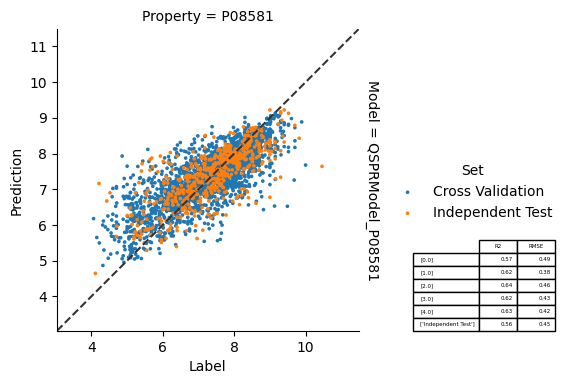

P09581
                                                  SMILES  P09581  split
0                   BrC(Cn1ncc2c(N3CCCC3)ncnc21)c1ccccc1     NaN  train
1                  BrC(Cn1ncc2c(N3CCCCC3)ncnc21)c1ccccc1     NaN  train
2                BrC(Cn1ncc2c(NCc3ccccc3)ncnc21)c1ccccc1     NaN  train
3          Brc1cc(CNc2ncc(Br)c(Nc3cc(C4CC4)[nH]n3)n2)on1     NaN  train
4                            Brc1cc2c(NCc3ccccc3)ncnc2s1     NaN  train
...                                                  ...     ...    ...
36999  c1nc2c(Nc3ccc(N4CCOCC4)cc3)nc(-c3ccc4c[nH]nc4c...     NaN  train
37000  c1nc2c(Nc3ccc(N4CCOCC4)cc3)nc(-c3ccc4c[nH]nc4c...     NaN  train
37001  c1ncc(-c2cc(CNc3nc(Nc4cc(C5CC5)[nH]n4)cc(N4CCO...     NaN  train
37002         c1ncc(CN2CCC(n3cnc4cnc5[nH]ccc5c43)CC2)cn1     NaN  train
37003                            c1nnc2nnc(N3CCOCC3)nn12     NaN  train

[37004 rows x 3 columns]
                                                  SMILES  P09581  split
494     C=C(C)c1ccc(NC(=O)c2nc(

/home/s2861704/.conda/envs/drugex_env/lib/python3.12/site-packages/qsprpred/data/tables/pandas.py:261: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df[name] = generate_padded_index(self.df.index, prefix=prefix)
/home/s2861704/.conda/envs/drugex_env/lib/python3.12/site-packages/qsprpred/data/tables/pandas.py:242: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df[self.idProp] = self.df[self.indexCols].apply(
/home/s2861704/.conda/envs/drugex_env/lib/python3.12/site-packages/qsprpred/data/tables/pand

Number of samples in train set: 217
Number of samples in test set: 56
QSPRModel_P09581
                Model                  QSPRID              Fold Property  \
0    QSPRModel_P09581  QSPRDataset_P09581_001               2.0   P09581   
1    QSPRModel_P09581  QSPRDataset_P09581_003               4.0   P09581   
2    QSPRModel_P09581  QSPRDataset_P09581_004               2.0   P09581   
3    QSPRModel_P09581  QSPRDataset_P09581_005               3.0   P09581   
4    QSPRModel_P09581  QSPRDataset_P09581_007               2.0   P09581   
..                ...                     ...               ...      ...   
268  QSPRModel_P09581  QSPRDataset_P09581_253  Independent Test   P09581   
269  QSPRModel_P09581  QSPRDataset_P09581_258  Independent Test   P09581   
270  QSPRModel_P09581  QSPRDataset_P09581_263  Independent Test   P09581   
271  QSPRModel_P09581  QSPRDataset_P09581_266  Independent Test   P09581   
272  QSPRModel_P09581  QSPRDataset_P09581_269  Independent Test   P09581   



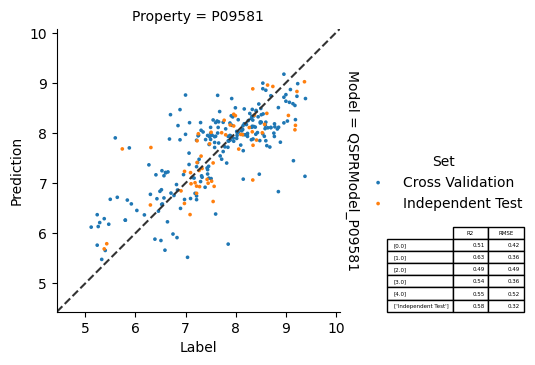

P09619
                                                  SMILES  P09619  split
0                   BrC(Cn1ncc2c(N3CCCC3)ncnc21)c1ccccc1     NaN  train
1                  BrC(Cn1ncc2c(N3CCCCC3)ncnc21)c1ccccc1     NaN  train
2                BrC(Cn1ncc2c(NCc3ccccc3)ncnc21)c1ccccc1     NaN  train
3          Brc1cc(CNc2ncc(Br)c(Nc3cc(C4CC4)[nH]n3)n2)on1     NaN  train
4                            Brc1cc2c(NCc3ccccc3)ncnc2s1     NaN  train
...                                                  ...     ...    ...
36999  c1nc2c(Nc3ccc(N4CCOCC4)cc3)nc(-c3ccc4c[nH]nc4c...     NaN  train
37000  c1nc2c(Nc3ccc(N4CCOCC4)cc3)nc(-c3ccc4c[nH]nc4c...     NaN  train
37001  c1ncc(-c2cc(CNc3nc(Nc4cc(C5CC5)[nH]n4)cc(N4CCO...     NaN  train
37002         c1ncc(CN2CCC(n3cnc4cnc5[nH]ccc5c43)CC2)cn1     NaN  train
37003                            c1nnc2nnc(N3CCOCC3)nn12     NaN  train

[37004 rows x 3 columns]
                                                  SMILES   P09619  split
279                    C#Cc1cc

/home/s2861704/.conda/envs/drugex_env/lib/python3.12/site-packages/qsprpred/data/tables/pandas.py:261: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df[name] = generate_padded_index(self.df.index, prefix=prefix)
/home/s2861704/.conda/envs/drugex_env/lib/python3.12/site-packages/qsprpred/data/tables/pandas.py:242: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df[self.idProp] = self.df[self.indexCols].apply(
/home/s2861704/.conda/envs/drugex_env/lib/python3.12/site-packages/qsprpred/data/tables/pand

Number of samples in train set: 580
Number of samples in test set: 141
QSPRModel_P09619
                Model                  QSPRID              Fold Property  \
0    QSPRModel_P09619  QSPRDataset_P09619_000               1.0   P09619   
1    QSPRModel_P09619  QSPRDataset_P09619_003               4.0   P09619   
2    QSPRModel_P09619  QSPRDataset_P09619_004               0.0   P09619   
3    QSPRModel_P09619  QSPRDataset_P09619_006               2.0   P09619   
4    QSPRModel_P09619  QSPRDataset_P09619_007               3.0   P09619   
..                ...                     ...               ...      ...   
716  QSPRModel_P09619  QSPRDataset_P09619_700  Independent Test   P09619   
717  QSPRModel_P09619  QSPRDataset_P09619_702  Independent Test   P09619   
718  QSPRModel_P09619  QSPRDataset_P09619_704  Independent Test   P09619   
719  QSPRModel_P09619  QSPRDataset_P09619_712  Independent Test   P09619   
720  QSPRModel_P09619  QSPRDataset_P09619_719  Independent Test   P09619   


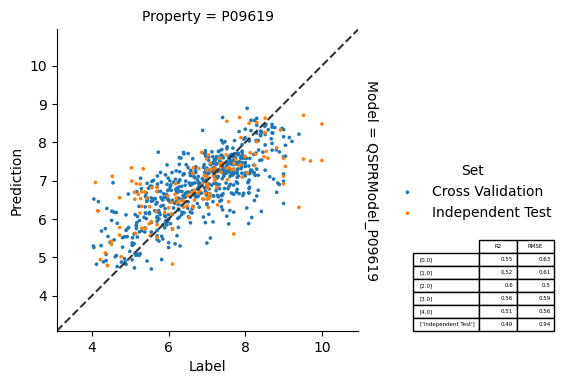

P10721
                                                  SMILES  P10721  split
0                   BrC(Cn1ncc2c(N3CCCC3)ncnc21)c1ccccc1     NaN  train
1                  BrC(Cn1ncc2c(N3CCCCC3)ncnc21)c1ccccc1     NaN  train
2                BrC(Cn1ncc2c(NCc3ccccc3)ncnc21)c1ccccc1     NaN  train
3          Brc1cc(CNc2ncc(Br)c(Nc3cc(C4CC4)[nH]n3)n2)on1     NaN  train
4                            Brc1cc2c(NCc3ccccc3)ncnc2s1     NaN  train
...                                                  ...     ...    ...
36999  c1nc2c(Nc3ccc(N4CCOCC4)cc3)nc(-c3ccc4c[nH]nc4c...     NaN  train
37000  c1nc2c(Nc3ccc(N4CCOCC4)cc3)nc(-c3ccc4c[nH]nc4c...     NaN  train
37001  c1ncc(-c2cc(CNc3nc(Nc4cc(C5CC5)[nH]n4)cc(N4CCO...     NaN  train
37002         c1ncc(CN2CCC(n3cnc4cnc5[nH]ccc5c43)CC2)cn1     NaN  train
37003                            c1nnc2nnc(N3CCOCC3)nn12     NaN  train

[37004 rows x 3 columns]
                                                  SMILES  P10721  split
242    C#Cc1cc(C(=O)Nc2ccc(CN3C

/home/s2861704/.conda/envs/drugex_env/lib/python3.12/site-packages/qsprpred/data/tables/pandas.py:261: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df[name] = generate_padded_index(self.df.index, prefix=prefix)
/home/s2861704/.conda/envs/drugex_env/lib/python3.12/site-packages/qsprpred/data/tables/pandas.py:242: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df[self.idProp] = self.df[self.indexCols].apply(
/home/s2861704/.conda/envs/drugex_env/lib/python3.12/site-packages/qsprpred/data/tables/pand

Number of samples in train set: 630
Number of samples in test set: 153
QSPRModel_P10721
                Model                  QSPRID              Fold Property  \
0    QSPRModel_P10721  QSPRDataset_P10721_000               1.0   P10721   
1    QSPRModel_P10721  QSPRDataset_P10721_002               4.0   P10721   
2    QSPRModel_P10721  QSPRDataset_P10721_003               0.0   P10721   
3    QSPRModel_P10721  QSPRDataset_P10721_004               2.0   P10721   
4    QSPRModel_P10721  QSPRDataset_P10721_006               4.0   P10721   
..                ...                     ...               ...      ...   
778  QSPRModel_P10721  QSPRDataset_P10721_756  Independent Test   P10721   
779  QSPRModel_P10721  QSPRDataset_P10721_759  Independent Test   P10721   
780  QSPRModel_P10721  QSPRDataset_P10721_769  Independent Test   P10721   
781  QSPRModel_P10721  QSPRDataset_P10721_771  Independent Test   P10721   
782  QSPRModel_P10721  QSPRDataset_P10721_775  Independent Test   P10721   


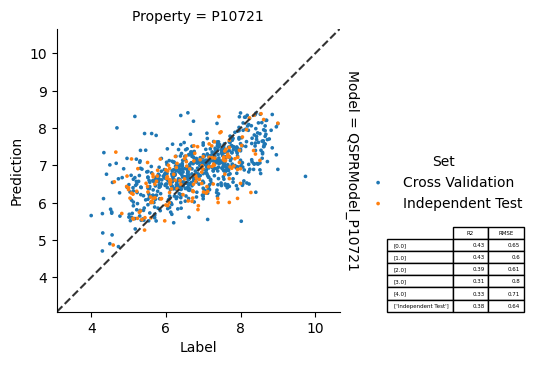

P11362
                                                  SMILES  P11362  split
0                   BrC(Cn1ncc2c(N3CCCC3)ncnc21)c1ccccc1     NaN  train
1                  BrC(Cn1ncc2c(N3CCCCC3)ncnc21)c1ccccc1     NaN  train
2                BrC(Cn1ncc2c(NCc3ccccc3)ncnc21)c1ccccc1     NaN  train
3          Brc1cc(CNc2ncc(Br)c(Nc3cc(C4CC4)[nH]n3)n2)on1     NaN  train
4                            Brc1cc2c(NCc3ccccc3)ncnc2s1     NaN  train
...                                                  ...     ...    ...
36999  c1nc2c(Nc3ccc(N4CCOCC4)cc3)nc(-c3ccc4c[nH]nc4c...     NaN  train
37000  c1nc2c(Nc3ccc(N4CCOCC4)cc3)nc(-c3ccc4c[nH]nc4c...     NaN  train
37001  c1ncc(-c2cc(CNc3nc(Nc4cc(C5CC5)[nH]n4)cc(N4CCO...     NaN  train
37002         c1ncc(CN2CCC(n3cnc4cnc5[nH]ccc5c43)CC2)cn1     NaN  train
37003                            c1nnc2nnc(N3CCOCC3)nn12     NaN  train

[37004 rows x 3 columns]
                                                  SMILES  P11362  split
177    C#CC(=O)N1CCC(n2cc(-c3cc

/home/s2861704/.conda/envs/drugex_env/lib/python3.12/site-packages/qsprpred/data/tables/pandas.py:261: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df[name] = generate_padded_index(self.df.index, prefix=prefix)
/home/s2861704/.conda/envs/drugex_env/lib/python3.12/site-packages/qsprpred/data/tables/pandas.py:242: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df[self.idProp] = self.df[self.indexCols].apply(
/home/s2861704/.conda/envs/drugex_env/lib/python3.12/site-packages/qsprpred/data/tables/pand

Number of samples in train set: 1356
Number of samples in test set: 341
QSPRModel_P11362
                 Model                   QSPRID              Fold Property  \
0     QSPRModel_P11362  QSPRDataset_P11362_0000               2.0   P11362   
1     QSPRModel_P11362  QSPRDataset_P11362_0001               4.0   P11362   
2     QSPRModel_P11362  QSPRDataset_P11362_0002               1.0   P11362   
3     QSPRModel_P11362  QSPRDataset_P11362_0003               1.0   P11362   
4     QSPRModel_P11362  QSPRDataset_P11362_0004               3.0   P11362   
...                ...                      ...               ...      ...   
1692  QSPRModel_P11362  QSPRDataset_P11362_1652  Independent Test   P11362   
1693  QSPRModel_P11362  QSPRDataset_P11362_1654  Independent Test   P11362   
1694  QSPRModel_P11362  QSPRDataset_P11362_1668  Independent Test   P11362   
1695  QSPRModel_P11362  QSPRDataset_P11362_1669  Independent Test   P11362   
1696  QSPRModel_P11362  QSPRDataset_P11362_1685  Inde

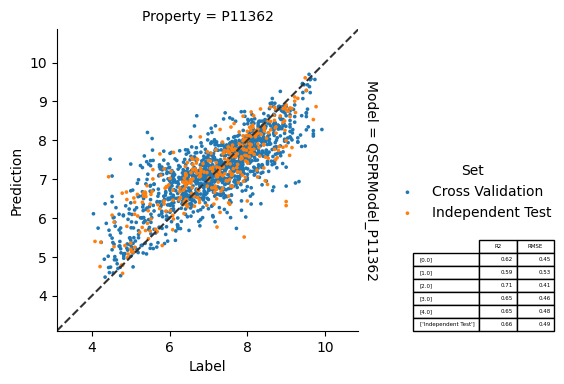

P12931
                                                  SMILES  P12931  split
0                   BrC(Cn1ncc2c(N3CCCC3)ncnc21)c1ccccc1    5.02  train
1                  BrC(Cn1ncc2c(N3CCCCC3)ncnc21)c1ccccc1    5.80  train
2                BrC(Cn1ncc2c(NCc3ccccc3)ncnc21)c1ccccc1    5.48  train
3          Brc1cc(CNc2ncc(Br)c(Nc3cc(C4CC4)[nH]n3)n2)on1     NaN  train
4                            Brc1cc2c(NCc3ccccc3)ncnc2s1     NaN  train
...                                                  ...     ...    ...
36999  c1nc2c(Nc3ccc(N4CCOCC4)cc3)nc(-c3ccc4c[nH]nc4c...     NaN  train
37000  c1nc2c(Nc3ccc(N4CCOCC4)cc3)nc(-c3ccc4c[nH]nc4c...     NaN  train
37001  c1ncc(-c2cc(CNc3nc(Nc4cc(C5CC5)[nH]n4)cc(N4CCO...     NaN  train
37002         c1ncc(CN2CCC(n3cnc4cnc5[nH]ccc5c43)CC2)cn1     NaN  train
37003                            c1nnc2nnc(N3CCOCC3)nn12     NaN  train

[37004 rows x 3 columns]
                                                  SMILES  P12931  split
0                   BrC(Cn1ncc2

/home/s2861704/.conda/envs/drugex_env/lib/python3.12/site-packages/qsprpred/data/tables/pandas.py:261: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df[name] = generate_padded_index(self.df.index, prefix=prefix)
/home/s2861704/.conda/envs/drugex_env/lib/python3.12/site-packages/qsprpred/data/tables/pandas.py:242: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df[self.idProp] = self.df[self.indexCols].apply(
/home/s2861704/.conda/envs/drugex_env/lib/python3.12/site-packages/qsprpred/data/tables/pand

Number of samples in train set: 1044
Number of samples in test set: 250
QSPRModel_P12931
                 Model                   QSPRID              Fold Property  \
0     QSPRModel_P12931  QSPRDataset_P12931_0000               1.0   P12931   
1     QSPRModel_P12931  QSPRDataset_P12931_0001               4.0   P12931   
2     QSPRModel_P12931  QSPRDataset_P12931_0002               0.0   P12931   
3     QSPRModel_P12931  QSPRDataset_P12931_0003               0.0   P12931   
4     QSPRModel_P12931  QSPRDataset_P12931_0004               4.0   P12931   
...                ...                      ...               ...      ...   
1289  QSPRModel_P12931  QSPRDataset_P12931_1265  Independent Test   P12931   
1290  QSPRModel_P12931  QSPRDataset_P12931_1267  Independent Test   P12931   
1291  QSPRModel_P12931  QSPRDataset_P12931_1271  Independent Test   P12931   
1292  QSPRModel_P12931  QSPRDataset_P12931_1284  Independent Test   P12931   
1293  QSPRModel_P12931  QSPRDataset_P12931_1293  Inde

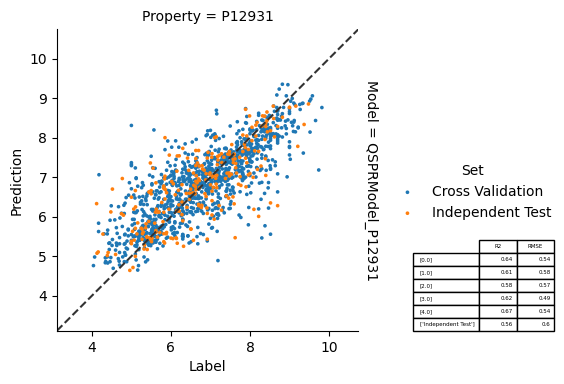

P16234
                                                  SMILES  P16234  split
0                   BrC(Cn1ncc2c(N3CCCC3)ncnc21)c1ccccc1     NaN  train
1                  BrC(Cn1ncc2c(N3CCCCC3)ncnc21)c1ccccc1     NaN  train
2                BrC(Cn1ncc2c(NCc3ccccc3)ncnc21)c1ccccc1     NaN  train
3          Brc1cc(CNc2ncc(Br)c(Nc3cc(C4CC4)[nH]n3)n2)on1     NaN  train
4                            Brc1cc2c(NCc3ccccc3)ncnc2s1     NaN  train
...                                                  ...     ...    ...
36999  c1nc2c(Nc3ccc(N4CCOCC4)cc3)nc(-c3ccc4c[nH]nc4c...     NaN  train
37000  c1nc2c(Nc3ccc(N4CCOCC4)cc3)nc(-c3ccc4c[nH]nc4c...     NaN  train
37001  c1ncc(-c2cc(CNc3nc(Nc4cc(C5CC5)[nH]n4)cc(N4CCO...     NaN  train
37002         c1ncc(CN2CCC(n3cnc4cnc5[nH]ccc5c43)CC2)cn1     NaN  train
37003                            c1nnc2nnc(N3CCOCC3)nn12     NaN  train

[37004 rows x 3 columns]
                                                  SMILES  P16234  split
439    C=C(C)C(=O)NCc1ccc(C(=O)

/home/s2861704/.conda/envs/drugex_env/lib/python3.12/site-packages/qsprpred/data/tables/pandas.py:261: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df[name] = generate_padded_index(self.df.index, prefix=prefix)
/home/s2861704/.conda/envs/drugex_env/lib/python3.12/site-packages/qsprpred/data/tables/pandas.py:242: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df[self.idProp] = self.df[self.indexCols].apply(
/home/s2861704/.conda/envs/drugex_env/lib/python3.12/site-packages/qsprpred/data/tables/pand

Number of samples in train set: 328
Number of samples in test set: 77
QSPRModel_P16234
                Model                  QSPRID              Fold Property  \
0    QSPRModel_P16234  QSPRDataset_P16234_000               3.0   P16234   
1    QSPRModel_P16234  QSPRDataset_P16234_003               4.0   P16234   
2    QSPRModel_P16234  QSPRDataset_P16234_004               2.0   P16234   
3    QSPRModel_P16234  QSPRDataset_P16234_006               0.0   P16234   
4    QSPRModel_P16234  QSPRDataset_P16234_007               3.0   P16234   
..                ...                     ...               ...      ...   
400  QSPRModel_P16234  QSPRDataset_P16234_374  Independent Test   P16234   
401  QSPRModel_P16234  QSPRDataset_P16234_383  Independent Test   P16234   
402  QSPRModel_P16234  QSPRDataset_P16234_392  Independent Test   P16234   
403  QSPRModel_P16234  QSPRDataset_P16234_393  Independent Test   P16234   
404  QSPRModel_P16234  QSPRDataset_P16234_394  Independent Test   P16234   



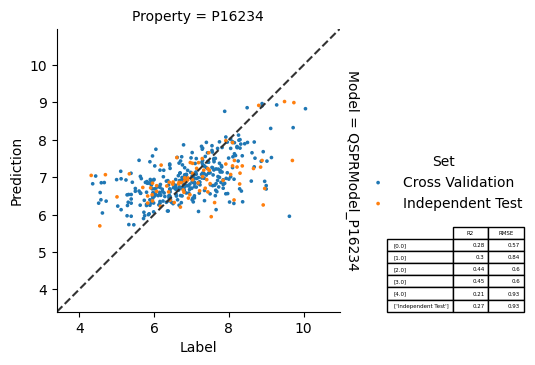

P17948
                                                  SMILES  P17948  split
0                   BrC(Cn1ncc2c(N3CCCC3)ncnc21)c1ccccc1     NaN  train
1                  BrC(Cn1ncc2c(N3CCCCC3)ncnc21)c1ccccc1     NaN  train
2                BrC(Cn1ncc2c(NCc3ccccc3)ncnc21)c1ccccc1     NaN  train
3          Brc1cc(CNc2ncc(Br)c(Nc3cc(C4CC4)[nH]n3)n2)on1     NaN  train
4                            Brc1cc2c(NCc3ccccc3)ncnc2s1     NaN  train
...                                                  ...     ...    ...
36999  c1nc2c(Nc3ccc(N4CCOCC4)cc3)nc(-c3ccc4c[nH]nc4c...     NaN  train
37000  c1nc2c(Nc3ccc(N4CCOCC4)cc3)nc(-c3ccc4c[nH]nc4c...     NaN  train
37001  c1ncc(-c2cc(CNc3nc(Nc4cc(C5CC5)[nH]n4)cc(N4CCO...     NaN  train
37002         c1ncc(CN2CCC(n3cnc4cnc5[nH]ccc5c43)CC2)cn1     NaN  train
37003                            c1nnc2nnc(N3CCOCC3)nn12     NaN  train

[37004 rows x 3 columns]
                                                  SMILES    P17948  split
343           C#Cc1cccc(Nc2nc

/home/s2861704/.conda/envs/drugex_env/lib/python3.12/site-packages/qsprpred/data/tables/pandas.py:261: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df[name] = generate_padded_index(self.df.index, prefix=prefix)
/home/s2861704/.conda/envs/drugex_env/lib/python3.12/site-packages/qsprpred/data/tables/pandas.py:242: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df[self.idProp] = self.df[self.indexCols].apply(
/home/s2861704/.conda/envs/drugex_env/lib/python3.12/site-packages/qsprpred/data/tables/pand

Number of samples in train set: 317
Number of samples in test set: 77
QSPRModel_P17948
                Model                  QSPRID              Fold Property  \
0    QSPRModel_P17948  QSPRDataset_P17948_001               3.0   P17948   
1    QSPRModel_P17948  QSPRDataset_P17948_002               4.0   P17948   
2    QSPRModel_P17948  QSPRDataset_P17948_003               2.0   P17948   
3    QSPRModel_P17948  QSPRDataset_P17948_004               0.0   P17948   
4    QSPRModel_P17948  QSPRDataset_P17948_006               3.0   P17948   
..                ...                     ...               ...      ...   
389  QSPRModel_P17948  QSPRDataset_P17948_359  Independent Test   P17948   
390  QSPRModel_P17948  QSPRDataset_P17948_371  Independent Test   P17948   
391  QSPRModel_P17948  QSPRDataset_P17948_380  Independent Test   P17948   
392  QSPRModel_P17948  QSPRDataset_P17948_382  Independent Test   P17948   
393  QSPRModel_P17948  QSPRDataset_P17948_392  Independent Test   P17948   



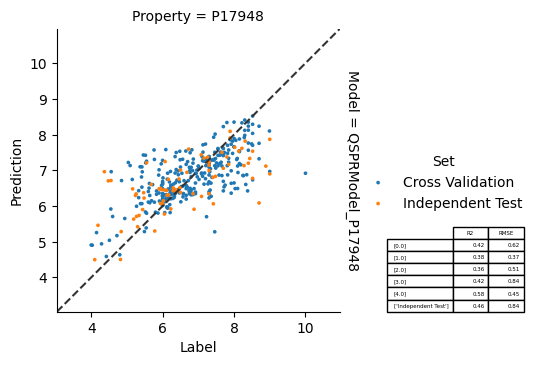

P21802
                                                  SMILES  P21802  split
0                   BrC(Cn1ncc2c(N3CCCC3)ncnc21)c1ccccc1     NaN  train
1                  BrC(Cn1ncc2c(N3CCCCC3)ncnc21)c1ccccc1     NaN  train
2                BrC(Cn1ncc2c(NCc3ccccc3)ncnc21)c1ccccc1     NaN  train
3          Brc1cc(CNc2ncc(Br)c(Nc3cc(C4CC4)[nH]n3)n2)on1     NaN  train
4                            Brc1cc2c(NCc3ccccc3)ncnc2s1     NaN  train
...                                                  ...     ...    ...
36999  c1nc2c(Nc3ccc(N4CCOCC4)cc3)nc(-c3ccc4c[nH]nc4c...     NaN  train
37000  c1nc2c(Nc3ccc(N4CCOCC4)cc3)nc(-c3ccc4c[nH]nc4c...     NaN  train
37001  c1ncc(-c2cc(CNc3nc(Nc4cc(C5CC5)[nH]n4)cc(N4CCO...     NaN  train
37002         c1ncc(CN2CCC(n3cnc4cnc5[nH]ccc5c43)CC2)cn1     NaN  train
37003                            c1nnc2nnc(N3CCOCC3)nn12     NaN  train

[37004 rows x 3 columns]
                                                  SMILES  P21802  split
178    C#CC(=O)N1CCC(n2nc(C#Cc3

/home/s2861704/.conda/envs/drugex_env/lib/python3.12/site-packages/qsprpred/data/tables/pandas.py:261: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df[name] = generate_padded_index(self.df.index, prefix=prefix)
/home/s2861704/.conda/envs/drugex_env/lib/python3.12/site-packages/qsprpred/data/tables/pandas.py:242: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df[self.idProp] = self.df[self.indexCols].apply(
/home/s2861704/.conda/envs/drugex_env/lib/python3.12/site-packages/qsprpred/data/tables/pand

Number of samples in train set: 821
Number of samples in test set: 208
QSPRModel_P21802
                 Model                   QSPRID              Fold Property  \
0     QSPRModel_P21802  QSPRDataset_P21802_0000               2.0   P21802   
1     QSPRModel_P21802  QSPRDataset_P21802_0001               4.0   P21802   
2     QSPRModel_P21802  QSPRDataset_P21802_0002               0.0   P21802   
3     QSPRModel_P21802  QSPRDataset_P21802_0003               2.0   P21802   
4     QSPRModel_P21802  QSPRDataset_P21802_0004               4.0   P21802   
...                ...                      ...               ...      ...   
1024  QSPRModel_P21802  QSPRDataset_P21802_1000  Independent Test   P21802   
1025  QSPRModel_P21802  QSPRDataset_P21802_1004  Independent Test   P21802   
1026  QSPRModel_P21802  QSPRDataset_P21802_1008  Independent Test   P21802   
1027  QSPRModel_P21802  QSPRDataset_P21802_1018  Independent Test   P21802   
1028  QSPRModel_P21802  QSPRDataset_P21802_1024  Indep

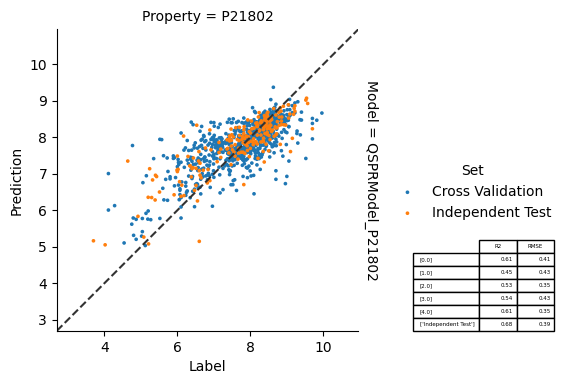

P22455
                                                  SMILES  P22455  split
0                   BrC(Cn1ncc2c(N3CCCC3)ncnc21)c1ccccc1     NaN  train
1                  BrC(Cn1ncc2c(N3CCCCC3)ncnc21)c1ccccc1     NaN  train
2                BrC(Cn1ncc2c(NCc3ccccc3)ncnc21)c1ccccc1     NaN  train
3          Brc1cc(CNc2ncc(Br)c(Nc3cc(C4CC4)[nH]n3)n2)on1     NaN  train
4                            Brc1cc2c(NCc3ccccc3)ncnc2s1     NaN  train
...                                                  ...     ...    ...
36999  c1nc2c(Nc3ccc(N4CCOCC4)cc3)nc(-c3ccc4c[nH]nc4c...     NaN  train
37000  c1nc2c(Nc3ccc(N4CCOCC4)cc3)nc(-c3ccc4c[nH]nc4c...     NaN  train
37001  c1ncc(-c2cc(CNc3nc(Nc4cc(C5CC5)[nH]n4)cc(N4CCO...     NaN  train
37002         c1ncc(CN2CCC(n3cnc4cnc5[nH]ccc5c43)CC2)cn1     NaN  train
37003                            c1nnc2nnc(N3CCOCC3)nn12     NaN  train

[37004 rows x 3 columns]
                                                  SMILES  P22455  split
177    C#CC(=O)N1CCC(n2cc(-c3cc

/home/s2861704/.conda/envs/drugex_env/lib/python3.12/site-packages/qsprpred/data/tables/pandas.py:261: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df[name] = generate_padded_index(self.df.index, prefix=prefix)
/home/s2861704/.conda/envs/drugex_env/lib/python3.12/site-packages/qsprpred/data/tables/pandas.py:242: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df[self.idProp] = self.df[self.indexCols].apply(
/home/s2861704/.conda/envs/drugex_env/lib/python3.12/site-packages/qsprpred/data/tables/pand

Number of samples in train set: 830
Number of samples in test set: 204
QSPRModel_P22455
                 Model                   QSPRID              Fold Property  \
0     QSPRModel_P22455  QSPRDataset_P22455_0000               2.0   P22455   
1     QSPRModel_P22455  QSPRDataset_P22455_0001               4.0   P22455   
2     QSPRModel_P22455  QSPRDataset_P22455_0002               0.0   P22455   
3     QSPRModel_P22455  QSPRDataset_P22455_0003               2.0   P22455   
4     QSPRModel_P22455  QSPRDataset_P22455_0005               4.0   P22455   
...                ...                      ...               ...      ...   
1029  QSPRModel_P22455  QSPRDataset_P22455_1006  Independent Test   P22455   
1030  QSPRModel_P22455  QSPRDataset_P22455_1011  Independent Test   P22455   
1031  QSPRModel_P22455  QSPRDataset_P22455_1014  Independent Test   P22455   
1032  QSPRModel_P22455  QSPRDataset_P22455_1025  Independent Test   P22455   
1033  QSPRModel_P22455  QSPRDataset_P22455_1027  Indep

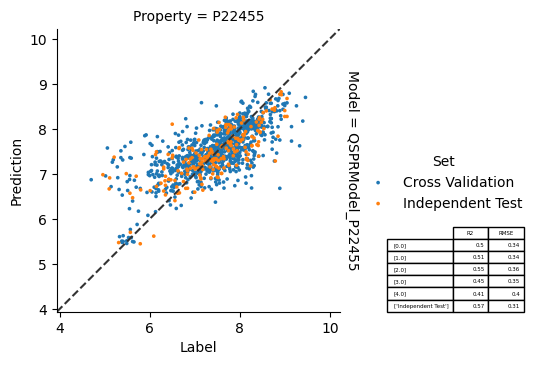

P22607
                                                  SMILES  P22607  split
0                   BrC(Cn1ncc2c(N3CCCC3)ncnc21)c1ccccc1     NaN  train
1                  BrC(Cn1ncc2c(N3CCCCC3)ncnc21)c1ccccc1     NaN  train
2                BrC(Cn1ncc2c(NCc3ccccc3)ncnc21)c1ccccc1     NaN  train
3          Brc1cc(CNc2ncc(Br)c(Nc3cc(C4CC4)[nH]n3)n2)on1     NaN  train
4                            Brc1cc2c(NCc3ccccc3)ncnc2s1     NaN  train
...                                                  ...     ...    ...
36999  c1nc2c(Nc3ccc(N4CCOCC4)cc3)nc(-c3ccc4c[nH]nc4c...     NaN  train
37000  c1nc2c(Nc3ccc(N4CCOCC4)cc3)nc(-c3ccc4c[nH]nc4c...     NaN  train
37001  c1ncc(-c2cc(CNc3nc(Nc4cc(C5CC5)[nH]n4)cc(N4CCO...     NaN  train
37002         c1ncc(CN2CCC(n3cnc4cnc5[nH]ccc5c43)CC2)cn1     NaN  train
37003                            c1nnc2nnc(N3CCOCC3)nn12     NaN  train

[37004 rows x 3 columns]
                                                  SMILES  P22607  split
178    C#CC(=O)N1CCC(n2nc(C#Cc3

/home/s2861704/.conda/envs/drugex_env/lib/python3.12/site-packages/qsprpred/data/tables/pandas.py:261: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df[name] = generate_padded_index(self.df.index, prefix=prefix)
/home/s2861704/.conda/envs/drugex_env/lib/python3.12/site-packages/qsprpred/data/tables/pandas.py:242: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df[self.idProp] = self.df[self.indexCols].apply(
/home/s2861704/.conda/envs/drugex_env/lib/python3.12/site-packages/qsprpred/data/tables/pand

Number of samples in train set: 964
Number of samples in test set: 242
QSPRModel_P22607
                 Model                   QSPRID              Fold Property  \
0     QSPRModel_P22607  QSPRDataset_P22607_0000               1.0   P22607   
1     QSPRModel_P22607  QSPRDataset_P22607_0001               4.0   P22607   
2     QSPRModel_P22607  QSPRDataset_P22607_0002               1.0   P22607   
3     QSPRModel_P22607  QSPRDataset_P22607_0003               2.0   P22607   
4     QSPRModel_P22607  QSPRDataset_P22607_0005               4.0   P22607   
...                ...                      ...               ...      ...   
1201  QSPRModel_P22607  QSPRDataset_P22607_1182  Independent Test   P22607   
1202  QSPRModel_P22607  QSPRDataset_P22607_1190  Independent Test   P22607   
1203  QSPRModel_P22607  QSPRDataset_P22607_1193  Independent Test   P22607   
1204  QSPRModel_P22607  QSPRDataset_P22607_1197  Independent Test   P22607   
1205  QSPRModel_P22607  QSPRDataset_P22607_1203  Indep

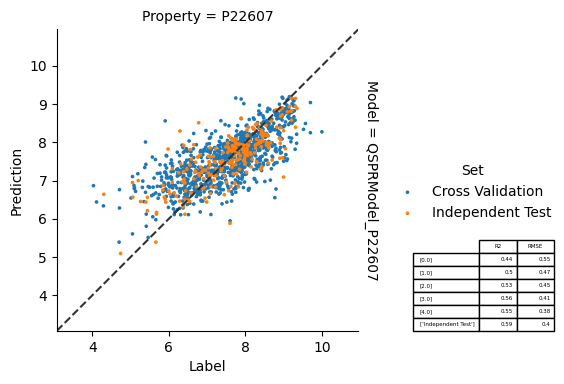

P23458
                                                  SMILES  P23458  split
0                   BrC(Cn1ncc2c(N3CCCC3)ncnc21)c1ccccc1     NaN  train
1                  BrC(Cn1ncc2c(N3CCCCC3)ncnc21)c1ccccc1     NaN  train
2                BrC(Cn1ncc2c(NCc3ccccc3)ncnc21)c1ccccc1     NaN  train
3          Brc1cc(CNc2ncc(Br)c(Nc3cc(C4CC4)[nH]n3)n2)on1     NaN  train
4                            Brc1cc2c(NCc3ccccc3)ncnc2s1     NaN  train
...                                                  ...     ...    ...
36999  c1nc2c(Nc3ccc(N4CCOCC4)cc3)nc(-c3ccc4c[nH]nc4c...     NaN  train
37000  c1nc2c(Nc3ccc(N4CCOCC4)cc3)nc(-c3ccc4c[nH]nc4c...     NaN  train
37001  c1ncc(-c2cc(CNc3nc(Nc4cc(C5CC5)[nH]n4)cc(N4CCO...     NaN  train
37002         c1ncc(CN2CCC(n3cnc4cnc5[nH]ccc5c43)CC2)cn1    6.46  train
37003                            c1nnc2nnc(N3CCOCC3)nn12     NaN  train

[37004 rows x 3 columns]
                                                  SMILES  P23458  split
249    C#Cc1ccc2ncc(C(=O)Nc3c[n

/home/s2861704/.conda/envs/drugex_env/lib/python3.12/site-packages/qsprpred/data/tables/pandas.py:261: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df[name] = generate_padded_index(self.df.index, prefix=prefix)
/home/s2861704/.conda/envs/drugex_env/lib/python3.12/site-packages/qsprpred/data/tables/pandas.py:242: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df[self.idProp] = self.df[self.indexCols].apply(
/home/s2861704/.conda/envs/drugex_env/lib/python3.12/site-packages/qsprpred/data/tables/pand

Number of samples in train set: 1691
Number of samples in test set: 422
QSPRModel_P23458
                 Model                   QSPRID              Fold Property  \
0     QSPRModel_P23458  QSPRDataset_P23458_0000               2.0   P23458   
1     QSPRModel_P23458  QSPRDataset_P23458_0001               4.0   P23458   
2     QSPRModel_P23458  QSPRDataset_P23458_0002               2.0   P23458   
3     QSPRModel_P23458  QSPRDataset_P23458_0003               2.0   P23458   
4     QSPRModel_P23458  QSPRDataset_P23458_0004               3.0   P23458   
...                ...                      ...               ...      ...   
2108  QSPRModel_P23458  QSPRDataset_P23458_2076  Independent Test   P23458   
2109  QSPRModel_P23458  QSPRDataset_P23458_2077  Independent Test   P23458   
2110  QSPRModel_P23458  QSPRDataset_P23458_2083  Independent Test   P23458   
2111  QSPRModel_P23458  QSPRDataset_P23458_2107  Independent Test   P23458   
2112  QSPRModel_P23458  QSPRDataset_P23458_2108  Inde

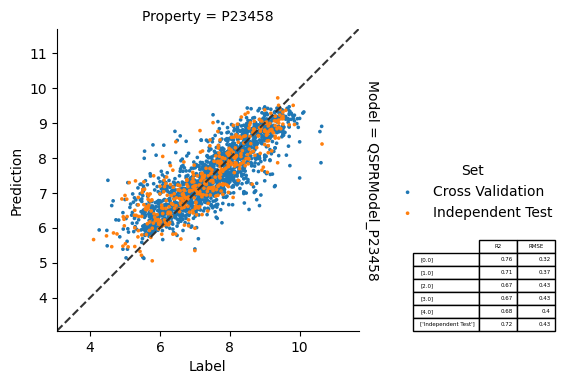

P29317
                                                  SMILES  P29317  split
0                   BrC(Cn1ncc2c(N3CCCC3)ncnc21)c1ccccc1     NaN  train
1                  BrC(Cn1ncc2c(N3CCCCC3)ncnc21)c1ccccc1     NaN  train
2                BrC(Cn1ncc2c(NCc3ccccc3)ncnc21)c1ccccc1     NaN  train
3          Brc1cc(CNc2ncc(Br)c(Nc3cc(C4CC4)[nH]n3)n2)on1     NaN  train
4                            Brc1cc2c(NCc3ccccc3)ncnc2s1     NaN  train
...                                                  ...     ...    ...
36999  c1nc2c(Nc3ccc(N4CCOCC4)cc3)nc(-c3ccc4c[nH]nc4c...     NaN  train
37000  c1nc2c(Nc3ccc(N4CCOCC4)cc3)nc(-c3ccc4c[nH]nc4c...     NaN  train
37001  c1ncc(-c2cc(CNc3nc(Nc4cc(C5CC5)[nH]n4)cc(N4CCO...     NaN  train
37002         c1ncc(CN2CCC(n3cnc4cnc5[nH]ccc5c43)CC2)cn1     NaN  train
37003                            c1nnc2nnc(N3CCOCC3)nn12     NaN  train

[37004 rows x 3 columns]
                                                  SMILES  P29317  split
3077   C=CCCCCCCN1CCOC(COc2cc3n

/home/s2861704/.conda/envs/drugex_env/lib/python3.12/site-packages/qsprpred/data/tables/pandas.py:261: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df[name] = generate_padded_index(self.df.index, prefix=prefix)
/home/s2861704/.conda/envs/drugex_env/lib/python3.12/site-packages/qsprpred/data/tables/pandas.py:242: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df[self.idProp] = self.df[self.indexCols].apply(
/home/s2861704/.conda/envs/drugex_env/lib/python3.12/site-packages/qsprpred/data/tables/pand

Number of samples in train set: 280
Number of samples in test set: 68
QSPRModel_P29317
                Model                  QSPRID              Fold Property  \
0    QSPRModel_P29317  QSPRDataset_P29317_000               2.0   P29317   
1    QSPRModel_P29317  QSPRDataset_P29317_003               3.0   P29317   
2    QSPRModel_P29317  QSPRDataset_P29317_006               1.0   P29317   
3    QSPRModel_P29317  QSPRDataset_P29317_007               3.0   P29317   
4    QSPRModel_P29317  QSPRDataset_P29317_009               3.0   P29317   
..                ...                     ...               ...      ...   
343  QSPRModel_P29317  QSPRDataset_P29317_322  Independent Test   P29317   
344  QSPRModel_P29317  QSPRDataset_P29317_325  Independent Test   P29317   
345  QSPRModel_P29317  QSPRDataset_P29317_327  Independent Test   P29317   
346  QSPRModel_P29317  QSPRDataset_P29317_330  Independent Test   P29317   
347  QSPRModel_P29317  QSPRDataset_P29317_342  Independent Test   P29317   



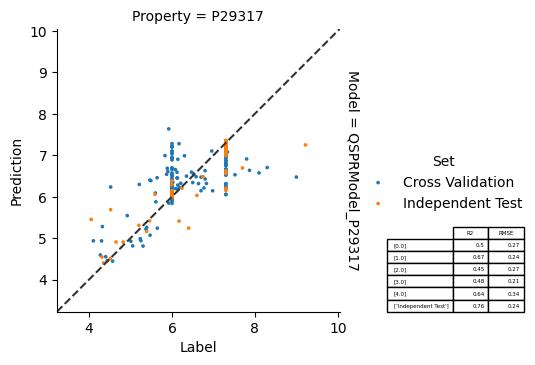

P29597
                                                  SMILES  P29597  split
0                   BrC(Cn1ncc2c(N3CCCC3)ncnc21)c1ccccc1     NaN  train
1                  BrC(Cn1ncc2c(N3CCCCC3)ncnc21)c1ccccc1     NaN  train
2                BrC(Cn1ncc2c(NCc3ccccc3)ncnc21)c1ccccc1     NaN  train
3          Brc1cc(CNc2ncc(Br)c(Nc3cc(C4CC4)[nH]n3)n2)on1     NaN  train
4                            Brc1cc2c(NCc3ccccc3)ncnc2s1     NaN  train
...                                                  ...     ...    ...
36999  c1nc2c(Nc3ccc(N4CCOCC4)cc3)nc(-c3ccc4c[nH]nc4c...     NaN  train
37000  c1nc2c(Nc3ccc(N4CCOCC4)cc3)nc(-c3ccc4c[nH]nc4c...     NaN  train
37001  c1ncc(-c2cc(CNc3nc(Nc4cc(C5CC5)[nH]n4)cc(N4CCO...     NaN  train
37002         c1ncc(CN2CCC(n3cnc4cnc5[nH]ccc5c43)CC2)cn1     NaN  train
37003                            c1nnc2nnc(N3CCOCC3)nn12     NaN  train

[37004 rows x 3 columns]
                                                  SMILES  P29597  split
243     C#Cc1cc(Cl)c(C(=O)Nc2cc

/home/s2861704/.conda/envs/drugex_env/lib/python3.12/site-packages/qsprpred/data/tables/pandas.py:261: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df[name] = generate_padded_index(self.df.index, prefix=prefix)
/home/s2861704/.conda/envs/drugex_env/lib/python3.12/site-packages/qsprpred/data/tables/pandas.py:242: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df[self.idProp] = self.df[self.indexCols].apply(
/home/s2861704/.conda/envs/drugex_env/lib/python3.12/site-packages/qsprpred/data/tables/pand

Number of samples in train set: 678
Number of samples in test set: 173
QSPRModel_P29597
                Model                  QSPRID              Fold Property  \
0    QSPRModel_P29597  QSPRDataset_P29597_000               1.0   P29597   
1    QSPRModel_P29597  QSPRDataset_P29597_002               4.0   P29597   
2    QSPRModel_P29597  QSPRDataset_P29597_003               0.0   P29597   
3    QSPRModel_P29597  QSPRDataset_P29597_005               2.0   P29597   
4    QSPRModel_P29597  QSPRDataset_P29597_008               4.0   P29597   
..                ...                     ...               ...      ...   
846  QSPRModel_P29597  QSPRDataset_P29597_831  Independent Test   P29597   
847  QSPRModel_P29597  QSPRDataset_P29597_833  Independent Test   P29597   
848  QSPRModel_P29597  QSPRDataset_P29597_842  Independent Test   P29597   
849  QSPRModel_P29597  QSPRDataset_P29597_843  Independent Test   P29597   
850  QSPRModel_P29597  QSPRDataset_P29597_844  Independent Test   P29597   


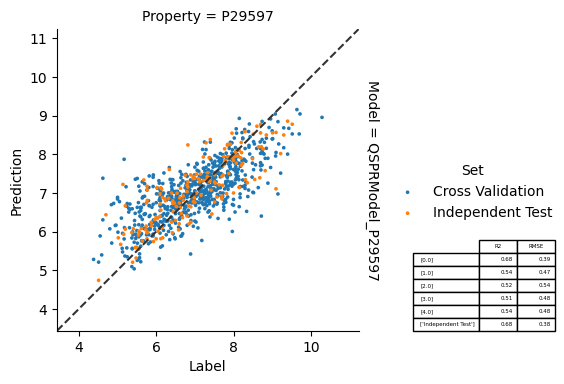

P30530
                                                  SMILES  P30530  split
0                   BrC(Cn1ncc2c(N3CCCC3)ncnc21)c1ccccc1     NaN  train
1                  BrC(Cn1ncc2c(N3CCCCC3)ncnc21)c1ccccc1     NaN  train
2                BrC(Cn1ncc2c(NCc3ccccc3)ncnc21)c1ccccc1     NaN  train
3          Brc1cc(CNc2ncc(Br)c(Nc3cc(C4CC4)[nH]n3)n2)on1     NaN  train
4                            Brc1cc2c(NCc3ccccc3)ncnc2s1     NaN  train
...                                                  ...     ...    ...
36999  c1nc2c(Nc3ccc(N4CCOCC4)cc3)nc(-c3ccc4c[nH]nc4c...     NaN  train
37000  c1nc2c(Nc3ccc(N4CCOCC4)cc3)nc(-c3ccc4c[nH]nc4c...     NaN  train
37001  c1ncc(-c2cc(CNc3nc(Nc4cc(C5CC5)[nH]n4)cc(N4CCO...     NaN  train
37002         c1ncc(CN2CCC(n3cnc4cnc5[nH]ccc5c43)CC2)cn1     NaN  train
37003                            c1nnc2nnc(N3CCOCC3)nn12     NaN  train

[37004 rows x 3 columns]
                                                  SMILES  P30530  split
495    C=C(C)c1ccc2c(c1)c(=O)c(

/home/s2861704/.conda/envs/drugex_env/lib/python3.12/site-packages/qsprpred/data/tables/pandas.py:261: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df[name] = generate_padded_index(self.df.index, prefix=prefix)
/home/s2861704/.conda/envs/drugex_env/lib/python3.12/site-packages/qsprpred/data/tables/pandas.py:242: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df[self.idProp] = self.df[self.indexCols].apply(
/home/s2861704/.conda/envs/drugex_env/lib/python3.12/site-packages/qsprpred/data/tables/pand

Number of samples in train set: 577
Number of samples in test set: 128
QSPRModel_P30530
                Model                  QSPRID              Fold Property  \
0    QSPRModel_P30530  QSPRDataset_P30530_000               1.0   P30530   
1    QSPRModel_P30530  QSPRDataset_P30530_001               4.0   P30530   
2    QSPRModel_P30530  QSPRDataset_P30530_002               0.0   P30530   
3    QSPRModel_P30530  QSPRDataset_P30530_003               2.0   P30530   
4    QSPRModel_P30530  QSPRDataset_P30530_004               3.0   P30530   
..                ...                     ...               ...      ...   
700  QSPRModel_P30530  QSPRDataset_P30530_690  Independent Test   P30530   
701  QSPRModel_P30530  QSPRDataset_P30530_693  Independent Test   P30530   
702  QSPRModel_P30530  QSPRDataset_P30530_694  Independent Test   P30530   
703  QSPRModel_P30530  QSPRDataset_P30530_698  Independent Test   P30530   
704  QSPRModel_P30530  QSPRDataset_P30530_703  Independent Test   P30530   


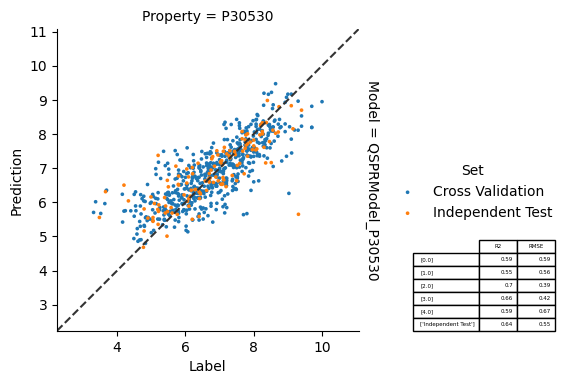

P35968
                                                  SMILES  P35968  split
0                   BrC(Cn1ncc2c(N3CCCC3)ncnc21)c1ccccc1     NaN  train
1                  BrC(Cn1ncc2c(N3CCCCC3)ncnc21)c1ccccc1     NaN  train
2                BrC(Cn1ncc2c(NCc3ccccc3)ncnc21)c1ccccc1     NaN  train
3          Brc1cc(CNc2ncc(Br)c(Nc3cc(C4CC4)[nH]n3)n2)on1     NaN  train
4                            Brc1cc2c(NCc3ccccc3)ncnc2s1     NaN  train
...                                                  ...     ...    ...
36999  c1nc2c(Nc3ccc(N4CCOCC4)cc3)nc(-c3ccc4c[nH]nc4c...     NaN  train
37000  c1nc2c(Nc3ccc(N4CCOCC4)cc3)nc(-c3ccc4c[nH]nc4c...     NaN  train
37001  c1ncc(-c2cc(CNc3nc(Nc4cc(C5CC5)[nH]n4)cc(N4CCO...     NaN  train
37002         c1ncc(CN2CCC(n3cnc4cnc5[nH]ccc5c43)CC2)cn1     NaN  train
37003                            c1nnc2nnc(N3CCOCC3)nn12     NaN  train

[37004 rows x 3 columns]
                                                  SMILES    P35968  split
11        Brc1ccc(-c2nc3cc(Nc

/home/s2861704/.conda/envs/drugex_env/lib/python3.12/site-packages/qsprpred/data/tables/pandas.py:261: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df[name] = generate_padded_index(self.df.index, prefix=prefix)
/home/s2861704/.conda/envs/drugex_env/lib/python3.12/site-packages/qsprpred/data/tables/pandas.py:242: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df[self.idProp] = self.df[self.indexCols].apply(
/home/s2861704/.conda/envs/drugex_env/lib/python3.12/site-packages/qsprpred/data/tables/pand

Number of samples in train set: 4588
Number of samples in test set: 1118
QSPRModel_P35968
                 Model                   QSPRID              Fold Property  \
0     QSPRModel_P35968  QSPRDataset_P35968_0000               1.0   P35968   
1     QSPRModel_P35968  QSPRDataset_P35968_0001               2.0   P35968   
2     QSPRModel_P35968  QSPRDataset_P35968_0002               3.0   P35968   
3     QSPRModel_P35968  QSPRDataset_P35968_0003               4.0   P35968   
4     QSPRModel_P35968  QSPRDataset_P35968_0004               4.0   P35968   
...                ...                      ...               ...      ...   
5701  QSPRModel_P35968  QSPRDataset_P35968_5686  Independent Test   P35968   
5702  QSPRModel_P35968  QSPRDataset_P35968_5691  Independent Test   P35968   
5703  QSPRModel_P35968  QSPRDataset_P35968_5697  Independent Test   P35968   
5704  QSPRModel_P35968  QSPRDataset_P35968_5698  Independent Test   P35968   
5705  QSPRModel_P35968  QSPRDataset_P35968_5702  Ind

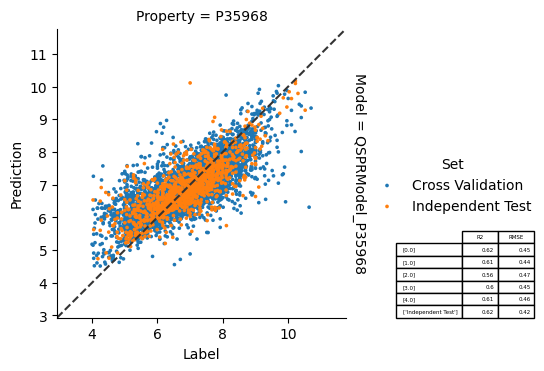

P36888
                                                  SMILES  P36888  split
0                   BrC(Cn1ncc2c(N3CCCC3)ncnc21)c1ccccc1     NaN  train
1                  BrC(Cn1ncc2c(N3CCCCC3)ncnc21)c1ccccc1     NaN  train
2                BrC(Cn1ncc2c(NCc3ccccc3)ncnc21)c1ccccc1     NaN  train
3          Brc1cc(CNc2ncc(Br)c(Nc3cc(C4CC4)[nH]n3)n2)on1     NaN  train
4                            Brc1cc2c(NCc3ccccc3)ncnc2s1     NaN  train
...                                                  ...     ...    ...
36999  c1nc2c(Nc3ccc(N4CCOCC4)cc3)nc(-c3ccc4c[nH]nc4c...     NaN  train
37000  c1nc2c(Nc3ccc(N4CCOCC4)cc3)nc(-c3ccc4c[nH]nc4c...     NaN  train
37001  c1ncc(-c2cc(CNc3nc(Nc4cc(C5CC5)[nH]n4)cc(N4CCO...     NaN  train
37002         c1ncc(CN2CCC(n3cnc4cnc5[nH]ccc5c43)CC2)cn1     NaN  train
37003                            c1nnc2nnc(N3CCOCC3)nn12     NaN  train

[37004 rows x 3 columns]
                                                  SMILES  P36888  split
21          Brc1ccc(Nc2nc(N3CCO

/home/s2861704/.conda/envs/drugex_env/lib/python3.12/site-packages/qsprpred/data/tables/pandas.py:261: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df[name] = generate_padded_index(self.df.index, prefix=prefix)
/home/s2861704/.conda/envs/drugex_env/lib/python3.12/site-packages/qsprpred/data/tables/pandas.py:242: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df[self.idProp] = self.df[self.indexCols].apply(
/home/s2861704/.conda/envs/drugex_env/lib/python3.12/site-packages/qsprpred/data/tables/pand

Number of samples in train set: 1705
Number of samples in test set: 433
QSPRModel_P36888
                 Model                   QSPRID              Fold Property  \
0     QSPRModel_P36888  QSPRDataset_P36888_0000               2.0   P36888   
1     QSPRModel_P36888  QSPRDataset_P36888_0001               4.0   P36888   
2     QSPRModel_P36888  QSPRDataset_P36888_0003               2.0   P36888   
3     QSPRModel_P36888  QSPRDataset_P36888_0004               2.0   P36888   
4     QSPRModel_P36888  QSPRDataset_P36888_0006               3.0   P36888   
...                ...                      ...               ...      ...   
2133  QSPRModel_P36888  QSPRDataset_P36888_2131  Independent Test   P36888   
2134  QSPRModel_P36888  QSPRDataset_P36888_2132  Independent Test   P36888   
2135  QSPRModel_P36888  QSPRDataset_P36888_2133  Independent Test   P36888   
2136  QSPRModel_P36888  QSPRDataset_P36888_2135  Independent Test   P36888   
2137  QSPRModel_P36888  QSPRDataset_P36888_2136  Inde

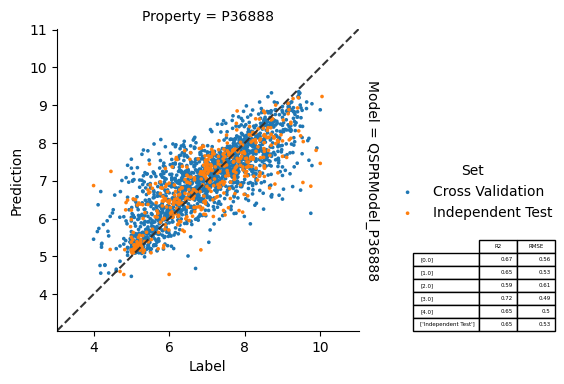

P43405
                                                  SMILES  P43405  split
0                   BrC(Cn1ncc2c(N3CCCC3)ncnc21)c1ccccc1     NaN  train
1                  BrC(Cn1ncc2c(N3CCCCC3)ncnc21)c1ccccc1     NaN  train
2                BrC(Cn1ncc2c(NCc3ccccc3)ncnc21)c1ccccc1     NaN  train
3          Brc1cc(CNc2ncc(Br)c(Nc3cc(C4CC4)[nH]n3)n2)on1     NaN  train
4                            Brc1cc2c(NCc3ccccc3)ncnc2s1     NaN  train
...                                                  ...     ...    ...
36999  c1nc2c(Nc3ccc(N4CCOCC4)cc3)nc(-c3ccc4c[nH]nc4c...    6.52  train
37000  c1nc2c(Nc3ccc(N4CCOCC4)cc3)nc(-c3ccc4c[nH]nc4c...    6.70  train
37001  c1ncc(-c2cc(CNc3nc(Nc4cc(C5CC5)[nH]n4)cc(N4CCO...     NaN  train
37002         c1ncc(CN2CCC(n3cnc4cnc5[nH]ccc5c43)CC2)cn1     NaN  train
37003                            c1nnc2nnc(N3CCOCC3)nn12     NaN  train

[37004 rows x 3 columns]
                                                  SMILES    P43405  split
487    C=C(C)COc1ccnc(-c2ccnc

/home/s2861704/.conda/envs/drugex_env/lib/python3.12/site-packages/qsprpred/data/tables/pandas.py:261: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df[name] = generate_padded_index(self.df.index, prefix=prefix)
/home/s2861704/.conda/envs/drugex_env/lib/python3.12/site-packages/qsprpred/data/tables/pandas.py:242: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df[self.idProp] = self.df[self.indexCols].apply(
/home/s2861704/.conda/envs/drugex_env/lib/python3.12/site-packages/qsprpred/data/tables/pand

Number of samples in train set: 1572
Number of samples in test set: 388
QSPRModel_P43405
                 Model                   QSPRID              Fold Property  \
0     QSPRModel_P43405  QSPRDataset_P43405_0000               3.0   P43405   
1     QSPRModel_P43405  QSPRDataset_P43405_0001               4.0   P43405   
2     QSPRModel_P43405  QSPRDataset_P43405_0002               2.0   P43405   
3     QSPRModel_P43405  QSPRDataset_P43405_0003               2.0   P43405   
4     QSPRModel_P43405  QSPRDataset_P43405_0004               3.0   P43405   
...                ...                      ...               ...      ...   
1955  QSPRModel_P43405  QSPRDataset_P43405_1936  Independent Test   P43405   
1956  QSPRModel_P43405  QSPRDataset_P43405_1948  Independent Test   P43405   
1957  QSPRModel_P43405  QSPRDataset_P43405_1950  Independent Test   P43405   
1958  QSPRModel_P43405  QSPRDataset_P43405_1955  Independent Test   P43405   
1959  QSPRModel_P43405  QSPRDataset_P43405_1957  Inde

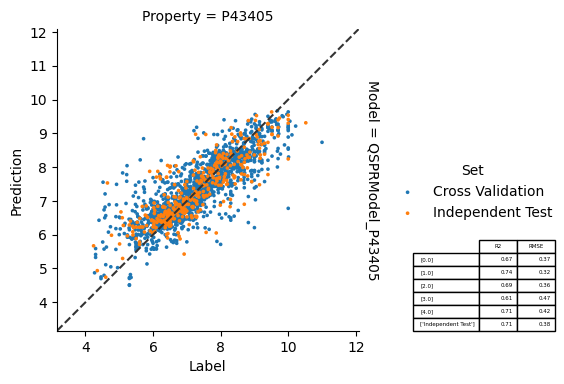

P52333
                                                  SMILES  P52333  split
0                   BrC(Cn1ncc2c(N3CCCC3)ncnc21)c1ccccc1     NaN  train
1                  BrC(Cn1ncc2c(N3CCCCC3)ncnc21)c1ccccc1     NaN  train
2                BrC(Cn1ncc2c(NCc3ccccc3)ncnc21)c1ccccc1     NaN  train
3          Brc1cc(CNc2ncc(Br)c(Nc3cc(C4CC4)[nH]n3)n2)on1     NaN  train
4                            Brc1cc2c(NCc3ccccc3)ncnc2s1     NaN  train
...                                                  ...     ...    ...
36999  c1nc2c(Nc3ccc(N4CCOCC4)cc3)nc(-c3ccc4c[nH]nc4c...     NaN  train
37000  c1nc2c(Nc3ccc(N4CCOCC4)cc3)nc(-c3ccc4c[nH]nc4c...     NaN  train
37001  c1ncc(-c2cc(CNc3nc(Nc4cc(C5CC5)[nH]n4)cc(N4CCO...     NaN  train
37002         c1ncc(CN2CCC(n3cnc4cnc5[nH]ccc5c43)CC2)cn1     NaN  train
37003                            c1nnc2nnc(N3CCOCC3)nn12     NaN  train

[37004 rows x 3 columns]
                                                  SMILES  P52333  split
187    C#CC(=O)N1CCN(c2ccc([N+]

/home/s2861704/.conda/envs/drugex_env/lib/python3.12/site-packages/qsprpred/data/tables/pandas.py:261: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df[name] = generate_padded_index(self.df.index, prefix=prefix)
/home/s2861704/.conda/envs/drugex_env/lib/python3.12/site-packages/qsprpred/data/tables/pandas.py:242: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df[self.idProp] = self.df[self.indexCols].apply(
/home/s2861704/.conda/envs/drugex_env/lib/python3.12/site-packages/qsprpred/data/tables/pand

Number of samples in train set: 1855
Number of samples in test set: 465
QSPRModel_P52333
                 Model                   QSPRID              Fold Property  \
0     QSPRModel_P52333  QSPRDataset_P52333_0001               2.0   P52333   
1     QSPRModel_P52333  QSPRDataset_P52333_0004               4.0   P52333   
2     QSPRModel_P52333  QSPRDataset_P52333_0005               2.0   P52333   
3     QSPRModel_P52333  QSPRDataset_P52333_0006               2.0   P52333   
4     QSPRModel_P52333  QSPRDataset_P52333_0008               3.0   P52333   
...                ...                      ...               ...      ...   
2315  QSPRModel_P52333  QSPRDataset_P52333_2296  Independent Test   P52333   
2316  QSPRModel_P52333  QSPRDataset_P52333_2306  Independent Test   P52333   
2317  QSPRModel_P52333  QSPRDataset_P52333_2310  Independent Test   P52333   
2318  QSPRModel_P52333  QSPRDataset_P52333_2313  Independent Test   P52333   
2319  QSPRModel_P52333  QSPRDataset_P52333_2315  Inde

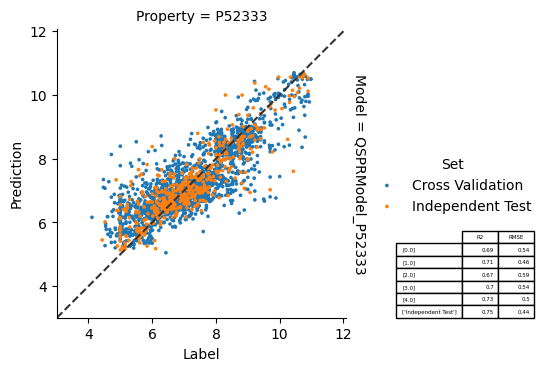

P54760
                                                  SMILES  P54760  split
0                   BrC(Cn1ncc2c(N3CCCC3)ncnc21)c1ccccc1     NaN  train
1                  BrC(Cn1ncc2c(N3CCCCC3)ncnc21)c1ccccc1     NaN  train
2                BrC(Cn1ncc2c(NCc3ccccc3)ncnc21)c1ccccc1     NaN  train
3          Brc1cc(CNc2ncc(Br)c(Nc3cc(C4CC4)[nH]n3)n2)on1     NaN  train
4                            Brc1cc2c(NCc3ccccc3)ncnc2s1     NaN  train
...                                                  ...     ...    ...
36999  c1nc2c(Nc3ccc(N4CCOCC4)cc3)nc(-c3ccc4c[nH]nc4c...     NaN  train
37000  c1nc2c(Nc3ccc(N4CCOCC4)cc3)nc(-c3ccc4c[nH]nc4c...     NaN  train
37001  c1ncc(-c2cc(CNc3nc(Nc4cc(C5CC5)[nH]n4)cc(N4CCO...     NaN  train
37002         c1ncc(CN2CCC(n3cnc4cnc5[nH]ccc5c43)CC2)cn1     NaN  train
37003                            c1nnc2nnc(N3CCOCC3)nn12     NaN  train

[37004 rows x 3 columns]
                                                  SMILES  P54760  split
886    C=CC(=O)N1CCC(Oc2cc3c(Nc

/home/s2861704/.conda/envs/drugex_env/lib/python3.12/site-packages/qsprpred/data/tables/pandas.py:261: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df[name] = generate_padded_index(self.df.index, prefix=prefix)
/home/s2861704/.conda/envs/drugex_env/lib/python3.12/site-packages/qsprpred/data/tables/pandas.py:242: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df[self.idProp] = self.df[self.indexCols].apply(
/home/s2861704/.conda/envs/drugex_env/lib/python3.12/site-packages/qsprpred/data/tables/pand

Number of samples in train set: 330
Number of samples in test set: 67
QSPRModel_P54760
                Model                  QSPRID              Fold Property  \
0    QSPRModel_P54760  QSPRDataset_P54760_000               3.0   P54760   
1    QSPRModel_P54760  QSPRDataset_P54760_001               4.0   P54760   
2    QSPRModel_P54760  QSPRDataset_P54760_002               2.0   P54760   
3    QSPRModel_P54760  QSPRDataset_P54760_003               0.0   P54760   
4    QSPRModel_P54760  QSPRDataset_P54760_004               3.0   P54760   
..                ...                     ...               ...      ...   
392  QSPRModel_P54760  QSPRDataset_P54760_364  Independent Test   P54760   
393  QSPRModel_P54760  QSPRDataset_P54760_369  Independent Test   P54760   
394  QSPRModel_P54760  QSPRDataset_P54760_370  Independent Test   P54760   
395  QSPRModel_P54760  QSPRDataset_P54760_374  Independent Test   P54760   
396  QSPRModel_P54760  QSPRDataset_P54760_379  Independent Test   P54760   



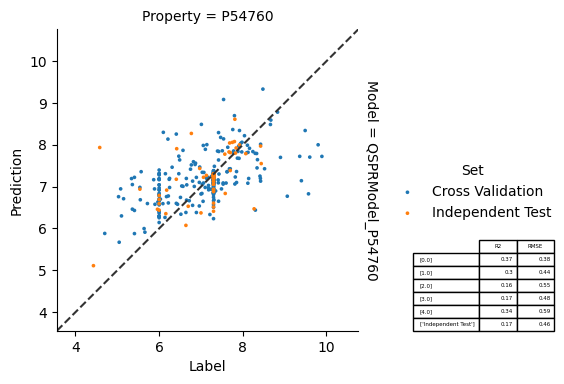

Q02763
                                                  SMILES  Q02763  split
0                   BrC(Cn1ncc2c(N3CCCC3)ncnc21)c1ccccc1     NaN  train
1                  BrC(Cn1ncc2c(N3CCCCC3)ncnc21)c1ccccc1     NaN  train
2                BrC(Cn1ncc2c(NCc3ccccc3)ncnc21)c1ccccc1     NaN  train
3          Brc1cc(CNc2ncc(Br)c(Nc3cc(C4CC4)[nH]n3)n2)on1     NaN  train
4                            Brc1cc2c(NCc3ccccc3)ncnc2s1     NaN  train
...                                                  ...     ...    ...
36999  c1nc2c(Nc3ccc(N4CCOCC4)cc3)nc(-c3ccc4c[nH]nc4c...     NaN  train
37000  c1nc2c(Nc3ccc(N4CCOCC4)cc3)nc(-c3ccc4c[nH]nc4c...     NaN  train
37001  c1ncc(-c2cc(CNc3nc(Nc4cc(C5CC5)[nH]n4)cc(N4CCO...     NaN  train
37002         c1ncc(CN2CCC(n3cnc4cnc5[nH]ccc5c43)CC2)cn1     NaN  train
37003                            c1nnc2nnc(N3CCOCC3)nn12     NaN  train

[37004 rows x 3 columns]
                                                  SMILES  Q02763  split
256    C#Cc1cccc(NC(=O)C2(C(=O)

/home/s2861704/.conda/envs/drugex_env/lib/python3.12/site-packages/qsprpred/data/tables/pandas.py:261: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df[name] = generate_padded_index(self.df.index, prefix=prefix)
/home/s2861704/.conda/envs/drugex_env/lib/python3.12/site-packages/qsprpred/data/tables/pandas.py:242: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df[self.idProp] = self.df[self.indexCols].apply(
/home/s2861704/.conda/envs/drugex_env/lib/python3.12/site-packages/qsprpred/data/tables/pand

Number of samples in train set: 355
Number of samples in test set: 90
QSPRModel_Q02763
                Model                  QSPRID              Fold Property  \
0    QSPRModel_Q02763  QSPRDataset_Q02763_001               3.0   Q02763   
1    QSPRModel_Q02763  QSPRDataset_Q02763_002               4.0   Q02763   
2    QSPRModel_Q02763  QSPRDataset_Q02763_003               2.0   Q02763   
3    QSPRModel_Q02763  QSPRDataset_Q02763_004               0.0   Q02763   
4    QSPRModel_Q02763  QSPRDataset_Q02763_005               3.0   Q02763   
..                ...                     ...               ...      ...   
440  QSPRModel_Q02763  QSPRDataset_Q02763_405  Independent Test   Q02763   
441  QSPRModel_Q02763  QSPRDataset_Q02763_416  Independent Test   Q02763   
442  QSPRModel_Q02763  QSPRDataset_Q02763_434  Independent Test   Q02763   
443  QSPRModel_Q02763  QSPRDataset_Q02763_439  Independent Test   Q02763   
444  QSPRModel_Q02763  QSPRDataset_Q02763_443  Independent Test   Q02763   



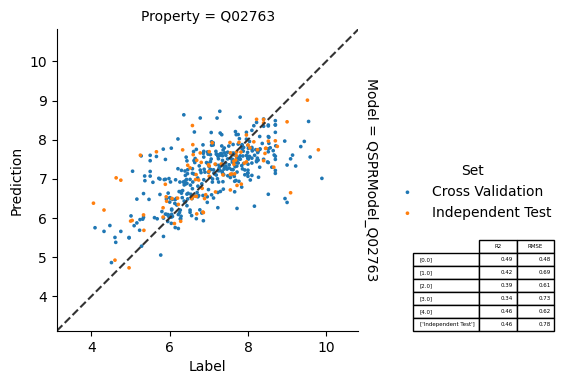

Q05397
                                                  SMILES  Q05397  split
0                   BrC(Cn1ncc2c(N3CCCC3)ncnc21)c1ccccc1     NaN  train
1                  BrC(Cn1ncc2c(N3CCCCC3)ncnc21)c1ccccc1     NaN  train
2                BrC(Cn1ncc2c(NCc3ccccc3)ncnc21)c1ccccc1     NaN  train
3          Brc1cc(CNc2ncc(Br)c(Nc3cc(C4CC4)[nH]n3)n2)on1     NaN  train
4                            Brc1cc2c(NCc3ccccc3)ncnc2s1     NaN  train
...                                                  ...     ...    ...
36999  c1nc2c(Nc3ccc(N4CCOCC4)cc3)nc(-c3ccc4c[nH]nc4c...     NaN  train
37000  c1nc2c(Nc3ccc(N4CCOCC4)cc3)nc(-c3ccc4c[nH]nc4c...     NaN  train
37001  c1ncc(-c2cc(CNc3nc(Nc4cc(C5CC5)[nH]n4)cc(N4CCO...     NaN  train
37002         c1ncc(CN2CCC(n3cnc4cnc5[nH]ccc5c43)CC2)cn1     NaN  train
37003                            c1nnc2nnc(N3CCOCC3)nn12     NaN  train

[37004 rows x 3 columns]
                                                 SMILES  Q05397  split
13                 Brc1ccc(-c2nn

/home/s2861704/.conda/envs/drugex_env/lib/python3.12/site-packages/qsprpred/data/tables/pandas.py:261: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df[name] = generate_padded_index(self.df.index, prefix=prefix)
/home/s2861704/.conda/envs/drugex_env/lib/python3.12/site-packages/qsprpred/data/tables/pandas.py:242: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df[self.idProp] = self.df[self.indexCols].apply(
/home/s2861704/.conda/envs/drugex_env/lib/python3.12/site-packages/qsprpred/data/tables/pand

Number of samples in train set: 1079
Number of samples in test set: 269
QSPRModel_Q05397
                 Model                   QSPRID              Fold Property  \
0     QSPRModel_Q05397  QSPRDataset_Q05397_0000               2.0   Q05397   
1     QSPRModel_Q05397  QSPRDataset_Q05397_0001               3.0   Q05397   
2     QSPRModel_Q05397  QSPRDataset_Q05397_0002               0.0   Q05397   
3     QSPRModel_Q05397  QSPRDataset_Q05397_0003               0.0   Q05397   
4     QSPRModel_Q05397  QSPRDataset_Q05397_0004               4.0   Q05397   
...                ...                      ...               ...      ...   
1343  QSPRModel_Q05397  QSPRDataset_Q05397_1334  Independent Test   Q05397   
1344  QSPRModel_Q05397  QSPRDataset_Q05397_1337  Independent Test   Q05397   
1345  QSPRModel_Q05397  QSPRDataset_Q05397_1338  Independent Test   Q05397   
1346  QSPRModel_Q05397  QSPRDataset_Q05397_1344  Independent Test   Q05397   
1347  QSPRModel_Q05397  QSPRDataset_Q05397_1346  Inde

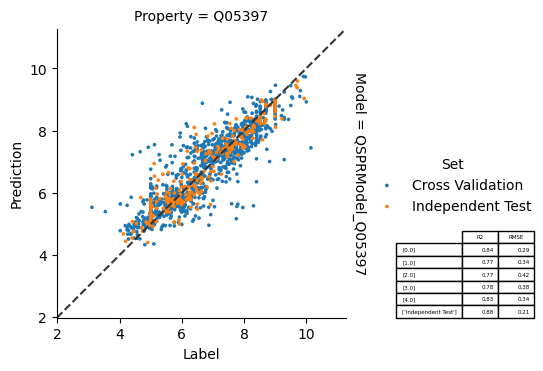

Q06187
                                                  SMILES  Q06187  split
0                   BrC(Cn1ncc2c(N3CCCC3)ncnc21)c1ccccc1     NaN  train
1                  BrC(Cn1ncc2c(N3CCCCC3)ncnc21)c1ccccc1     NaN  train
2                BrC(Cn1ncc2c(NCc3ccccc3)ncnc21)c1ccccc1     NaN  train
3          Brc1cc(CNc2ncc(Br)c(Nc3cc(C4CC4)[nH]n3)n2)on1     NaN  train
4                            Brc1cc2c(NCc3ccccc3)ncnc2s1     NaN  train
...                                                  ...     ...    ...
36999  c1nc2c(Nc3ccc(N4CCOCC4)cc3)nc(-c3ccc4c[nH]nc4c...    6.43  train
37000  c1nc2c(Nc3ccc(N4CCOCC4)cc3)nc(-c3ccc4c[nH]nc4c...    7.14  train
37001  c1ncc(-c2cc(CNc3nc(Nc4cc(C5CC5)[nH]n4)cc(N4CCO...     NaN  train
37002         c1ncc(CN2CCC(n3cnc4cnc5[nH]ccc5c43)CC2)cn1     NaN  train
37003                            c1nnc2nnc(N3CCOCC3)nn12     NaN  train

[37004 rows x 3 columns]
                                                  SMILES  Q06187  split
156    C#CC(=O)N(C)CCOc1c(N)ncn

/home/s2861704/.conda/envs/drugex_env/lib/python3.12/site-packages/qsprpred/data/tables/pandas.py:261: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df[name] = generate_padded_index(self.df.index, prefix=prefix)
/home/s2861704/.conda/envs/drugex_env/lib/python3.12/site-packages/qsprpred/data/tables/pandas.py:242: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df[self.idProp] = self.df[self.indexCols].apply(
/home/s2861704/.conda/envs/drugex_env/lib/python3.12/site-packages/qsprpred/data/tables/pand

Number of samples in train set: 1605
Number of samples in test set: 414
QSPRModel_Q06187
                 Model                   QSPRID              Fold Property  \
0     QSPRModel_Q06187  QSPRDataset_Q06187_0000               2.0   Q06187   
1     QSPRModel_Q06187  QSPRDataset_Q06187_0002               4.0   Q06187   
2     QSPRModel_Q06187  QSPRDataset_Q06187_0004               2.0   Q06187   
3     QSPRModel_Q06187  QSPRDataset_Q06187_0007               2.0   Q06187   
4     QSPRModel_Q06187  QSPRDataset_Q06187_0008               3.0   Q06187   
...                ...                      ...               ...      ...   
2014  QSPRModel_Q06187  QSPRDataset_Q06187_1996  Independent Test   Q06187   
2015  QSPRModel_Q06187  QSPRDataset_Q06187_1998  Independent Test   Q06187   
2016  QSPRModel_Q06187  QSPRDataset_Q06187_2012  Independent Test   Q06187   
2017  QSPRModel_Q06187  QSPRDataset_Q06187_2015  Independent Test   Q06187   
2018  QSPRModel_Q06187  QSPRDataset_Q06187_2016  Inde

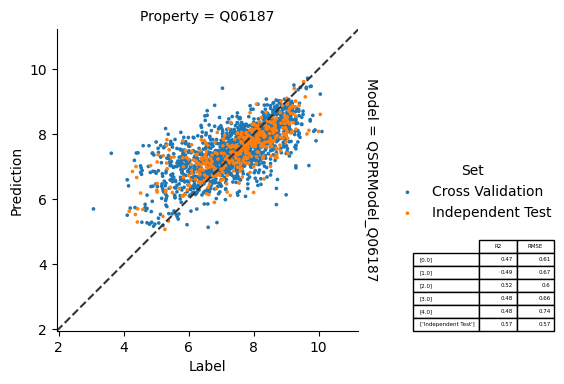

Q06418
                                                  SMILES  Q06418  split
0                   BrC(Cn1ncc2c(N3CCCC3)ncnc21)c1ccccc1     NaN  train
1                  BrC(Cn1ncc2c(N3CCCCC3)ncnc21)c1ccccc1     NaN  train
2                BrC(Cn1ncc2c(NCc3ccccc3)ncnc21)c1ccccc1     NaN  train
3          Brc1cc(CNc2ncc(Br)c(Nc3cc(C4CC4)[nH]n3)n2)on1     NaN  train
4                            Brc1cc2c(NCc3ccccc3)ncnc2s1     NaN  train
...                                                  ...     ...    ...
36999  c1nc2c(Nc3ccc(N4CCOCC4)cc3)nc(-c3ccc4c[nH]nc4c...     NaN  train
37000  c1nc2c(Nc3ccc(N4CCOCC4)cc3)nc(-c3ccc4c[nH]nc4c...     NaN  train
37001  c1ncc(-c2cc(CNc3nc(Nc4cc(C5CC5)[nH]n4)cc(N4CCO...     NaN  train
37002         c1ncc(CN2CCC(n3cnc4cnc5[nH]ccc5c43)CC2)cn1     NaN  train
37003                            c1nnc2nnc(N3CCOCC3)nn12     NaN  train

[37004 rows x 3 columns]
                                                  SMILES  Q06418  split
343           C#Cc1cccc(Nc2ncnc

/home/s2861704/.conda/envs/drugex_env/lib/python3.12/site-packages/qsprpred/data/tables/pandas.py:261: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df[name] = generate_padded_index(self.df.index, prefix=prefix)
/home/s2861704/.conda/envs/drugex_env/lib/python3.12/site-packages/qsprpred/data/tables/pandas.py:242: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df[self.idProp] = self.df[self.indexCols].apply(
/home/s2861704/.conda/envs/drugex_env/lib/python3.12/site-packages/qsprpred/data/tables/pand

Number of samples in train set: 239
Number of samples in test set: 63
QSPRModel_Q06418
                Model                  QSPRID              Fold Property  \
0    QSPRModel_Q06418  QSPRDataset_Q06418_003               2.0   Q06418   
1    QSPRModel_Q06418  QSPRDataset_Q06418_005               4.0   Q06418   
2    QSPRModel_Q06418  QSPRDataset_Q06418_006               2.0   Q06418   
3    QSPRModel_Q06418  QSPRDataset_Q06418_007               3.0   Q06418   
4    QSPRModel_Q06418  QSPRDataset_Q06418_009               2.0   Q06418   
..                ...                     ...               ...      ...   
297  QSPRModel_Q06418  QSPRDataset_Q06418_288  Independent Test   Q06418   
298  QSPRModel_Q06418  QSPRDataset_Q06418_291  Independent Test   Q06418   
299  QSPRModel_Q06418  QSPRDataset_Q06418_292  Independent Test   Q06418   
300  QSPRModel_Q06418  QSPRDataset_Q06418_297  Independent Test   Q06418   
301  QSPRModel_Q06418  QSPRDataset_Q06418_299  Independent Test   Q06418   



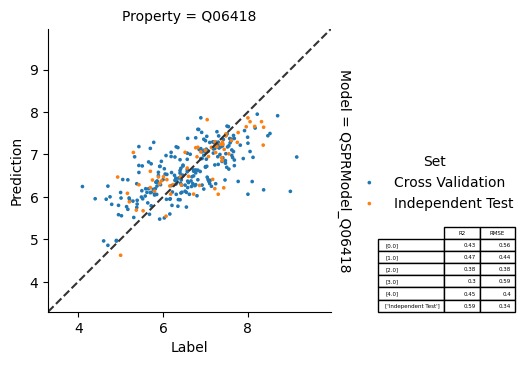

Q07912
                                                  SMILES  Q07912  split
0                   BrC(Cn1ncc2c(N3CCCC3)ncnc21)c1ccccc1     NaN  train
1                  BrC(Cn1ncc2c(N3CCCCC3)ncnc21)c1ccccc1     NaN  train
2                BrC(Cn1ncc2c(NCc3ccccc3)ncnc21)c1ccccc1     NaN  train
3          Brc1cc(CNc2ncc(Br)c(Nc3cc(C4CC4)[nH]n3)n2)on1     NaN  train
4                            Brc1cc2c(NCc3ccccc3)ncnc2s1     NaN  train
...                                                  ...     ...    ...
36999  c1nc2c(Nc3ccc(N4CCOCC4)cc3)nc(-c3ccc4c[nH]nc4c...     NaN  train
37000  c1nc2c(Nc3ccc(N4CCOCC4)cc3)nc(-c3ccc4c[nH]nc4c...     NaN  train
37001  c1ncc(-c2cc(CNc3nc(Nc4cc(C5CC5)[nH]n4)cc(N4CCO...     NaN  train
37002         c1ncc(CN2CCC(n3cnc4cnc5[nH]ccc5c43)CC2)cn1     NaN  train
37003                            c1nnc2nnc(N3CCOCC3)nn12     NaN  train

[37004 rows x 3 columns]
                                                  SMILES  Q07912  split
130             Brc1cnc(Nc2ccc(

/home/s2861704/.conda/envs/drugex_env/lib/python3.12/site-packages/qsprpred/data/tables/pandas.py:261: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df[name] = generate_padded_index(self.df.index, prefix=prefix)
/home/s2861704/.conda/envs/drugex_env/lib/python3.12/site-packages/qsprpred/data/tables/pandas.py:242: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df[self.idProp] = self.df[self.indexCols].apply(
/home/s2861704/.conda/envs/drugex_env/lib/python3.12/site-packages/qsprpred/data/tables/pand

Number of samples in train set: 360
Number of samples in test set: 90
QSPRModel_Q07912
                Model                  QSPRID              Fold Property  \
0    QSPRModel_Q07912  QSPRDataset_Q07912_004               3.0   Q07912   
1    QSPRModel_Q07912  QSPRDataset_Q07912_006               4.0   Q07912   
2    QSPRModel_Q07912  QSPRDataset_Q07912_007               2.0   Q07912   
3    QSPRModel_Q07912  QSPRDataset_Q07912_008               0.0   Q07912   
4    QSPRModel_Q07912  QSPRDataset_Q07912_009               3.0   Q07912   
..                ...                     ...               ...      ...   
445  QSPRModel_Q07912  QSPRDataset_Q07912_419  Independent Test   Q07912   
446  QSPRModel_Q07912  QSPRDataset_Q07912_427  Independent Test   Q07912   
447  QSPRModel_Q07912  QSPRDataset_Q07912_431  Independent Test   Q07912   
448  QSPRModel_Q07912  QSPRDataset_Q07912_432  Independent Test   Q07912   
449  QSPRModel_Q07912  QSPRDataset_Q07912_433  Independent Test   Q07912   



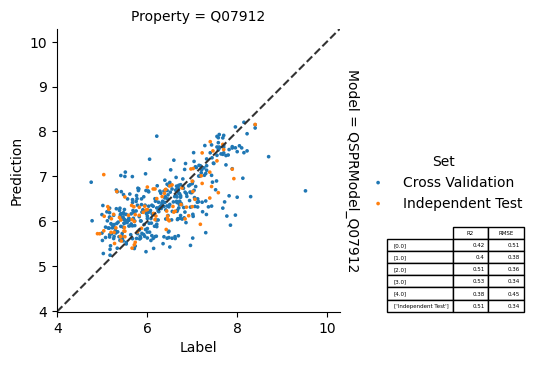

Q08345
                                                  SMILES  Q08345  split
0                   BrC(Cn1ncc2c(N3CCCC3)ncnc21)c1ccccc1     NaN  train
1                  BrC(Cn1ncc2c(N3CCCCC3)ncnc21)c1ccccc1     NaN  train
2                BrC(Cn1ncc2c(NCc3ccccc3)ncnc21)c1ccccc1     NaN  train
3          Brc1cc(CNc2ncc(Br)c(Nc3cc(C4CC4)[nH]n3)n2)on1     NaN  train
4                            Brc1cc2c(NCc3ccccc3)ncnc2s1     NaN  train
...                                                  ...     ...    ...
36999  c1nc2c(Nc3ccc(N4CCOCC4)cc3)nc(-c3ccc4c[nH]nc4c...     NaN  train
37000  c1nc2c(Nc3ccc(N4CCOCC4)cc3)nc(-c3ccc4c[nH]nc4c...     NaN  train
37001  c1ncc(-c2cc(CNc3nc(Nc4cc(C5CC5)[nH]n4)cc(N4CCO...     NaN  train
37002         c1ncc(CN2CCC(n3cnc4cnc5[nH]ccc5c43)CC2)cn1     NaN  train
37003                            c1nnc2nnc(N3CCOCC3)nn12     NaN  train

[37004 rows x 3 columns]
                                                  SMILES  Q08345  split
199    C#CCCC1(CC(=O)N2CCN(Cc3c

/home/s2861704/.conda/envs/drugex_env/lib/python3.12/site-packages/qsprpred/data/tables/pandas.py:261: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df[name] = generate_padded_index(self.df.index, prefix=prefix)
/home/s2861704/.conda/envs/drugex_env/lib/python3.12/site-packages/qsprpred/data/tables/pandas.py:242: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df[self.idProp] = self.df[self.indexCols].apply(
/home/s2861704/.conda/envs/drugex_env/lib/python3.12/site-packages/qsprpred/data/tables/pand

Number of samples in train set: 208
Number of samples in test set: 47
QSPRModel_Q08345
                Model                  QSPRID              Fold Property  \
0    QSPRModel_Q08345  QSPRDataset_Q08345_000               2.0   Q08345   
1    QSPRModel_Q08345  QSPRDataset_Q08345_001               4.0   Q08345   
2    QSPRModel_Q08345  QSPRDataset_Q08345_003               2.0   Q08345   
3    QSPRModel_Q08345  QSPRDataset_Q08345_004               3.0   Q08345   
4    QSPRModel_Q08345  QSPRDataset_Q08345_005               2.0   Q08345   
..                ...                     ...               ...      ...   
250  QSPRModel_Q08345  QSPRDataset_Q08345_233  Independent Test   Q08345   
251  QSPRModel_Q08345  QSPRDataset_Q08345_234  Independent Test   Q08345   
252  QSPRModel_Q08345  QSPRDataset_Q08345_242  Independent Test   Q08345   
253  QSPRModel_Q08345  QSPRDataset_Q08345_244  Independent Test   Q08345   
254  QSPRModel_Q08345  QSPRDataset_Q08345_248  Independent Test   Q08345   



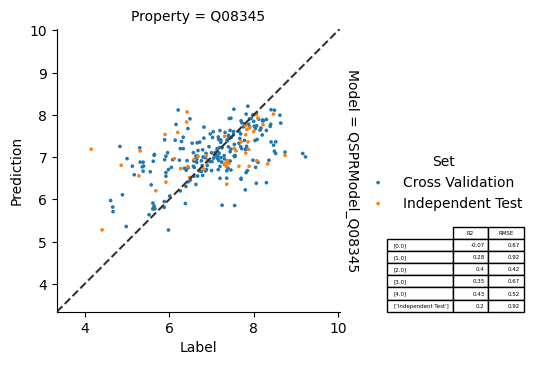

Q08881
                                                  SMILES  Q08881  split
0                   BrC(Cn1ncc2c(N3CCCC3)ncnc21)c1ccccc1     NaN  train
1                  BrC(Cn1ncc2c(N3CCCCC3)ncnc21)c1ccccc1     NaN  train
2                BrC(Cn1ncc2c(NCc3ccccc3)ncnc21)c1ccccc1     NaN  train
3          Brc1cc(CNc2ncc(Br)c(Nc3cc(C4CC4)[nH]n3)n2)on1     NaN  train
4                            Brc1cc2c(NCc3ccccc3)ncnc2s1     NaN  train
...                                                  ...     ...    ...
36999  c1nc2c(Nc3ccc(N4CCOCC4)cc3)nc(-c3ccc4c[nH]nc4c...     NaN  train
37000  c1nc2c(Nc3ccc(N4CCOCC4)cc3)nc(-c3ccc4c[nH]nc4c...     NaN  train
37001  c1ncc(-c2cc(CNc3nc(Nc4cc(C5CC5)[nH]n4)cc(N4CCO...     NaN  train
37002         c1ncc(CN2CCC(n3cnc4cnc5[nH]ccc5c43)CC2)cn1     NaN  train
37003                            c1nnc2nnc(N3CCOCC3)nn12     NaN  train

[37004 rows x 3 columns]
                                                  SMILES  Q08881  split
158    C#CC(=O)N1CC(c2c[nH]n3c(

/home/s2861704/.conda/envs/drugex_env/lib/python3.12/site-packages/qsprpred/data/tables/pandas.py:261: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df[name] = generate_padded_index(self.df.index, prefix=prefix)
/home/s2861704/.conda/envs/drugex_env/lib/python3.12/site-packages/qsprpred/data/tables/pandas.py:242: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df[self.idProp] = self.df[self.indexCols].apply(
/home/s2861704/.conda/envs/drugex_env/lib/python3.12/site-packages/qsprpred/data/tables/pand

Number of samples in train set: 346
Number of samples in test set: 84
QSPRModel_Q08881
                Model                  QSPRID              Fold Property  \
0    QSPRModel_Q08881  QSPRDataset_Q08881_000               3.0   Q08881   
1    QSPRModel_Q08881  QSPRDataset_Q08881_003               4.0   Q08881   
2    QSPRModel_Q08881  QSPRDataset_Q08881_004               2.0   Q08881   
3    QSPRModel_Q08881  QSPRDataset_Q08881_006               0.0   Q08881   
4    QSPRModel_Q08881  QSPRDataset_Q08881_008               3.0   Q08881   
..                ...                     ...               ...      ...   
425  QSPRModel_Q08881  QSPRDataset_Q08881_405  Independent Test   Q08881   
426  QSPRModel_Q08881  QSPRDataset_Q08881_408  Independent Test   Q08881   
427  QSPRModel_Q08881  QSPRDataset_Q08881_410  Independent Test   Q08881   
428  QSPRModel_Q08881  QSPRDataset_Q08881_412  Independent Test   Q08881   
429  QSPRModel_Q08881  QSPRDataset_Q08881_415  Independent Test   Q08881   



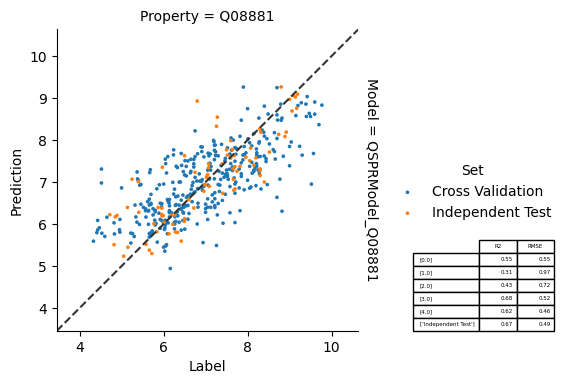

Q12866
                                                  SMILES  Q12866  split
0                   BrC(Cn1ncc2c(N3CCCC3)ncnc21)c1ccccc1     NaN  train
1                  BrC(Cn1ncc2c(N3CCCCC3)ncnc21)c1ccccc1     NaN  train
2                BrC(Cn1ncc2c(NCc3ccccc3)ncnc21)c1ccccc1     NaN  train
3          Brc1cc(CNc2ncc(Br)c(Nc3cc(C4CC4)[nH]n3)n2)on1     NaN  train
4                            Brc1cc2c(NCc3ccccc3)ncnc2s1     NaN  train
...                                                  ...     ...    ...
36999  c1nc2c(Nc3ccc(N4CCOCC4)cc3)nc(-c3ccc4c[nH]nc4c...     NaN  train
37000  c1nc2c(Nc3ccc(N4CCOCC4)cc3)nc(-c3ccc4c[nH]nc4c...     NaN  train
37001  c1ncc(-c2cc(CNc3nc(Nc4cc(C5CC5)[nH]n4)cc(N4CCO...     NaN  train
37002         c1ncc(CN2CCC(n3cnc4cnc5[nH]ccc5c43)CC2)cn1     NaN  train
37003                            c1nnc2nnc(N3CCOCC3)nn12     NaN  train

[37004 rows x 3 columns]
                                                  SMILES  Q12866  split
4023   CC(=O)N1CCN(c2ccc(Nc3ncc

/home/s2861704/.conda/envs/drugex_env/lib/python3.12/site-packages/qsprpred/data/tables/pandas.py:261: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df[name] = generate_padded_index(self.df.index, prefix=prefix)
/home/s2861704/.conda/envs/drugex_env/lib/python3.12/site-packages/qsprpred/data/tables/pandas.py:242: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df[self.idProp] = self.df[self.indexCols].apply(
/home/s2861704/.conda/envs/drugex_env/lib/python3.12/site-packages/qsprpred/data/tables/pand

Number of samples in train set: 281
Number of samples in test set: 66
QSPRModel_Q12866
                Model                  QSPRID              Fold Property  \
0    QSPRModel_Q12866  QSPRDataset_Q12866_002               2.0   Q12866   
1    QSPRModel_Q12866  QSPRDataset_Q12866_003               3.0   Q12866   
2    QSPRModel_Q12866  QSPRDataset_Q12866_004               1.0   Q12866   
3    QSPRModel_Q12866  QSPRDataset_Q12866_006               3.0   Q12866   
4    QSPRModel_Q12866  QSPRDataset_Q12866_007               3.0   Q12866   
..                ...                     ...               ...      ...   
342  QSPRModel_Q12866  QSPRDataset_Q12866_329  Independent Test   Q12866   
343  QSPRModel_Q12866  QSPRDataset_Q12866_335  Independent Test   Q12866   
344  QSPRModel_Q12866  QSPRDataset_Q12866_338  Independent Test   Q12866   
345  QSPRModel_Q12866  QSPRDataset_Q12866_339  Independent Test   Q12866   
346  QSPRModel_Q12866  QSPRDataset_Q12866_343  Independent Test   Q12866   



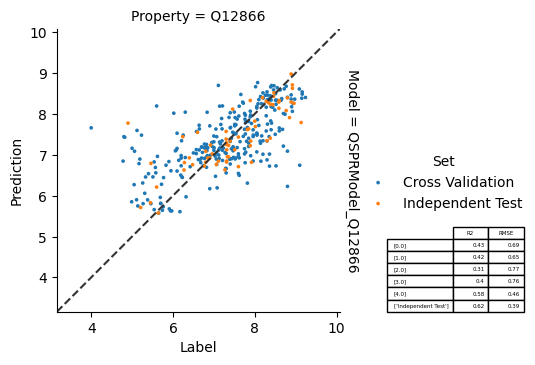

Q16288
                                                  SMILES  Q16288  split
0                   BrC(Cn1ncc2c(N3CCCC3)ncnc21)c1ccccc1     NaN  train
1                  BrC(Cn1ncc2c(N3CCCCC3)ncnc21)c1ccccc1     NaN  train
2                BrC(Cn1ncc2c(NCc3ccccc3)ncnc21)c1ccccc1     NaN  train
3          Brc1cc(CNc2ncc(Br)c(Nc3cc(C4CC4)[nH]n3)n2)on1     NaN  train
4                            Brc1cc2c(NCc3ccccc3)ncnc2s1     NaN  train
...                                                  ...     ...    ...
36999  c1nc2c(Nc3ccc(N4CCOCC4)cc3)nc(-c3ccc4c[nH]nc4c...     NaN  train
37000  c1nc2c(Nc3ccc(N4CCOCC4)cc3)nc(-c3ccc4c[nH]nc4c...     NaN  train
37001  c1ncc(-c2cc(CNc3nc(Nc4cc(C5CC5)[nH]n4)cc(N4CCO...     NaN  train
37002         c1ncc(CN2CCC(n3cnc4cnc5[nH]ccc5c43)CC2)cn1     NaN  train
37003                            c1nnc2nnc(N3CCOCC3)nn12     NaN  train

[37004 rows x 3 columns]
                                                  SMILES  Q16288  split
420            C(=Cc1[nH]nc2ccc

/home/s2861704/.conda/envs/drugex_env/lib/python3.12/site-packages/qsprpred/data/tables/pandas.py:261: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df[name] = generate_padded_index(self.df.index, prefix=prefix)
/home/s2861704/.conda/envs/drugex_env/lib/python3.12/site-packages/qsprpred/data/tables/pandas.py:242: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df[self.idProp] = self.df[self.indexCols].apply(
/home/s2861704/.conda/envs/drugex_env/lib/python3.12/site-packages/qsprpred/data/tables/pand

Number of samples in train set: 187
Number of samples in test set: 48
QSPRModel_Q16288
                Model                  QSPRID              Fold Property  \
0    QSPRModel_Q16288  QSPRDataset_Q16288_001               2.0   Q16288   
1    QSPRModel_Q16288  QSPRDataset_Q16288_002               4.0   Q16288   
2    QSPRModel_Q16288  QSPRDataset_Q16288_006               1.0   Q16288   
3    QSPRModel_Q16288  QSPRDataset_Q16288_008               3.0   Q16288   
4    QSPRModel_Q16288  QSPRDataset_Q16288_009               2.0   Q16288   
..                ...                     ...               ...      ...   
230  QSPRModel_Q16288  QSPRDataset_Q16288_213  Independent Test   Q16288   
231  QSPRModel_Q16288  QSPRDataset_Q16288_214  Independent Test   Q16288   
232  QSPRModel_Q16288  QSPRDataset_Q16288_220  Independent Test   Q16288   
233  QSPRModel_Q16288  QSPRDataset_Q16288_223  Independent Test   Q16288   
234  QSPRModel_Q16288  QSPRDataset_Q16288_231  Independent Test   Q16288   



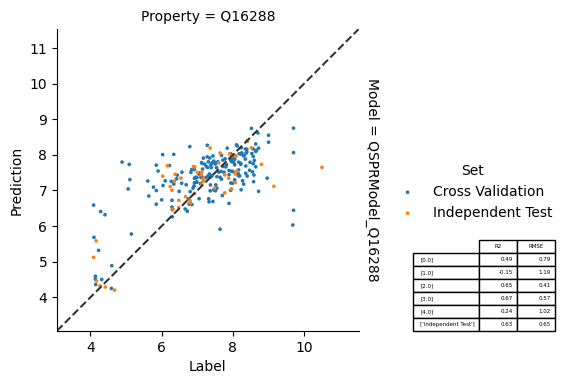

Q16620
                                                  SMILES  Q16620  split
0                   BrC(Cn1ncc2c(N3CCCC3)ncnc21)c1ccccc1     NaN  train
1                  BrC(Cn1ncc2c(N3CCCCC3)ncnc21)c1ccccc1     NaN  train
2                BrC(Cn1ncc2c(NCc3ccccc3)ncnc21)c1ccccc1     NaN  train
3          Brc1cc(CNc2ncc(Br)c(Nc3cc(C4CC4)[nH]n3)n2)on1     NaN  train
4                            Brc1cc2c(NCc3ccccc3)ncnc2s1     NaN  train
...                                                  ...     ...    ...
36999  c1nc2c(Nc3ccc(N4CCOCC4)cc3)nc(-c3ccc4c[nH]nc4c...     NaN  train
37000  c1nc2c(Nc3ccc(N4CCOCC4)cc3)nc(-c3ccc4c[nH]nc4c...     NaN  train
37001  c1ncc(-c2cc(CNc3nc(Nc4cc(C5CC5)[nH]n4)cc(N4CCO...     NaN  train
37002         c1ncc(CN2CCC(n3cnc4cnc5[nH]ccc5c43)CC2)cn1     NaN  train
37003                            c1nnc2nnc(N3CCOCC3)nn12     NaN  train

[37004 rows x 3 columns]
                                                  SMILES    Q16620  split
420            C(=Cc1[nH]nc2c

/home/s2861704/.conda/envs/drugex_env/lib/python3.12/site-packages/qsprpred/data/tables/pandas.py:261: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df[name] = generate_padded_index(self.df.index, prefix=prefix)
/home/s2861704/.conda/envs/drugex_env/lib/python3.12/site-packages/qsprpred/data/tables/pandas.py:242: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df[self.idProp] = self.df[self.indexCols].apply(
/home/s2861704/.conda/envs/drugex_env/lib/python3.12/site-packages/qsprpred/data/tables/pand

Number of samples in train set: 298
Number of samples in test set: 79
QSPRModel_Q16620
                Model                  QSPRID              Fold Property  \
0    QSPRModel_Q16620  QSPRDataset_Q16620_001               2.0   Q16620   
1    QSPRModel_Q16620  QSPRDataset_Q16620_004               4.0   Q16620   
2    QSPRModel_Q16620  QSPRDataset_Q16620_008               2.0   Q16620   
3    QSPRModel_Q16620  QSPRDataset_Q16620_009               4.0   Q16620   
4    QSPRModel_Q16620  QSPRDataset_Q16620_010               3.0   Q16620   
..                ...                     ...               ...      ...   
372  QSPRModel_Q16620  QSPRDataset_Q16620_346  Independent Test   Q16620   
373  QSPRModel_Q16620  QSPRDataset_Q16620_356  Independent Test   Q16620   
374  QSPRModel_Q16620  QSPRDataset_Q16620_361  Independent Test   Q16620   
375  QSPRModel_Q16620  QSPRDataset_Q16620_371  Independent Test   Q16620   
376  QSPRModel_Q16620  QSPRDataset_Q16620_373  Independent Test   Q16620   



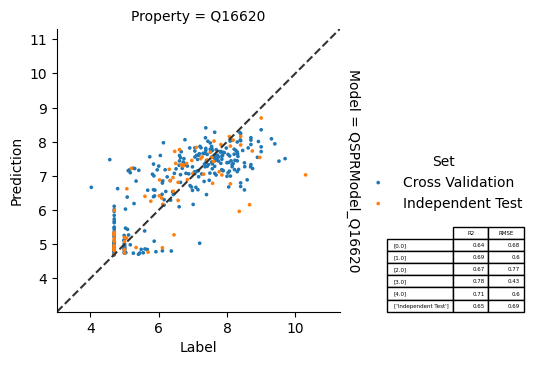

Q16832
                                                  SMILES  Q16832  split
0                   BrC(Cn1ncc2c(N3CCCC3)ncnc21)c1ccccc1     NaN  train
1                  BrC(Cn1ncc2c(N3CCCCC3)ncnc21)c1ccccc1     NaN  train
2                BrC(Cn1ncc2c(NCc3ccccc3)ncnc21)c1ccccc1     NaN  train
3          Brc1cc(CNc2ncc(Br)c(Nc3cc(C4CC4)[nH]n3)n2)on1     NaN  train
4                            Brc1cc2c(NCc3ccccc3)ncnc2s1     NaN  train
...                                                  ...     ...    ...
36999  c1nc2c(Nc3ccc(N4CCOCC4)cc3)nc(-c3ccc4c[nH]nc4c...     NaN  train
37000  c1nc2c(Nc3ccc(N4CCOCC4)cc3)nc(-c3ccc4c[nH]nc4c...     NaN  train
37001  c1ncc(-c2cc(CNc3nc(Nc4cc(C5CC5)[nH]n4)cc(N4CCO...     NaN  train
37002         c1ncc(CN2CCC(n3cnc4cnc5[nH]ccc5c43)CC2)cn1     NaN  train
37003                            c1nnc2nnc(N3CCOCC3)nn12     NaN  train

[37004 rows x 3 columns]
                                                  SMILES  Q16832  split
4177   CC(=O)Nc1cc(Oc2ccc(CNC(=

/home/s2861704/.conda/envs/drugex_env/lib/python3.12/site-packages/qsprpred/data/tables/pandas.py:261: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df[name] = generate_padded_index(self.df.index, prefix=prefix)
/home/s2861704/.conda/envs/drugex_env/lib/python3.12/site-packages/qsprpred/data/tables/pandas.py:242: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df[self.idProp] = self.df[self.indexCols].apply(
/home/s2861704/.conda/envs/drugex_env/lib/python3.12/site-packages/qsprpred/data/tables/pand

Number of samples in train set: 168
Number of samples in test set: 42
QSPRModel_Q16832
                Model                  QSPRID              Fold Property  \
0    QSPRModel_Q16832  QSPRDataset_Q16832_001               2.0   Q16832   
1    QSPRModel_Q16832  QSPRDataset_Q16832_002               4.0   Q16832   
2    QSPRModel_Q16832  QSPRDataset_Q16832_003               1.0   Q16832   
3    QSPRModel_Q16832  QSPRDataset_Q16832_004               3.0   Q16832   
4    QSPRModel_Q16832  QSPRDataset_Q16832_006               1.0   Q16832   
..                ...                     ...               ...      ...   
205  QSPRModel_Q16832  QSPRDataset_Q16832_192  Independent Test   Q16832   
206  QSPRModel_Q16832  QSPRDataset_Q16832_194  Independent Test   Q16832   
207  QSPRModel_Q16832  QSPRDataset_Q16832_197  Independent Test   Q16832   
208  QSPRModel_Q16832  QSPRDataset_Q16832_201  Independent Test   Q16832   
209  QSPRModel_Q16832  QSPRDataset_Q16832_204  Independent Test   Q16832   



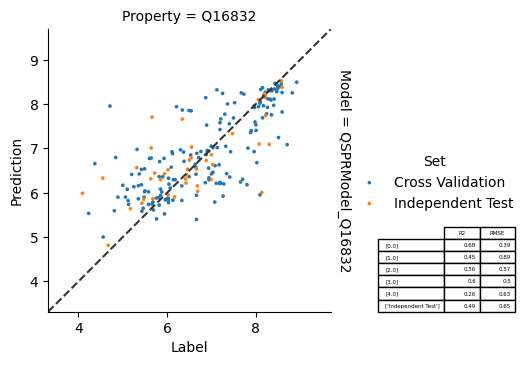

In [4]:
for target in targets_kinase200:
    print(target)
    df_st = df[["SMILES", target, "split"]]
    print(df_st)
    df_st_nonan = df_st.dropna(axis=0)
    
    print(df_st_nonan)

    # Create dataset
    os.makedirs("output/final/data", exist_ok=True)
    ds_name = "QSPRDataset_" + target
    dataset = QSPRDataset(
        df=df_st_nonan,
        store_dir="output/final/data",
        name=ds_name,
        target_props=[{"name": target, "task": "REGRESSION"}],
        random_state=42,
        overwrite=True
    )
    dataset.save()
    dataset.getDF()

    # calculate compound features and split dataset into train and test
    feature_calculators = [MorganFP(radius=3, nBits=2048)]
    dataset.prepareDataset(
        split=ManualSplit(splitcol=dataset.df["split"], trainval="train", testval="test"),
        feature_calculators=feature_calculators,
        recalculate_features=True,
    )
    print(f"Number of samples in train set: {len(dataset.y)}")
    print(f"Number of samples in test set: {len(dataset.y_ind)}")

    os.makedirs("/home/s2861704/ppk/test_kin/output/final/models", exist_ok=True)
    model_name = "QSPRModel_" + target
    model = SklearnModel(
        base_dir="/home/s2861704/ppk/test_kin/output/final/models",
        # alg=KNeighbourssRegressor,
        alg=RandomForestRegressor,
        name=model_name
    )

    CrossValAssessor("r2")(model, dataset)
    TestSetAssessor("r2")(model, dataset)
    model.fitDataset(dataset)
    _ = model.save()

    # plot results
    path = '/home/s2861704/ppk/test_kin/output/final/'
    fullname = os.path.join(path, target)
    outdir = fullname + '.png'

    plot = CorrelationPlot([model])
    axes, summary = plot.make(save=True, show=True, out_path=outdir)

In [4]:
targets_kinase200 = df.columns[1:42].tolist()
display(targets_kinase200)
print(len(targets_kinase200))

selected_targets = targets_kinase200.copy()
del selected_targets[32:]
del selected_targets[29:31]
del selected_targets[16:18]
del selected_targets[11:14]
del selected_targets[8]
del selected_targets[4:7]
display(selected_targets)
print(len(selected_targets))

top_targets = targets_kinase200.copy()
del top_targets[32:]
del top_targets[29:31]
del top_targets[26]
del top_targets[22:25]
del top_targets[10:21]
del top_targets[8]
del top_targets[4:7]
del top_targets[0:2]
display(top_targets)
print(len(top_targets))

['O60674',
 'P00519',
 'P00533',
 'P04626',
 'P04629',
 'P06213',
 'P06239',
 'P07333',
 'P07949',
 'P08069',
 'P08581',
 'P09581',
 'P09619',
 'P10721',
 'P11362',
 'P12931',
 'P16234',
 'P17948',
 'P21802',
 'P22455',
 'P22607',
 'P23458',
 'P29317',
 'P29597',
 'P30530',
 'P35968',
 'P36888',
 'P43405',
 'P52333',
 'P54760',
 'Q02763',
 'Q05397',
 'Q06187',
 'Q06418',
 'Q07912',
 'Q08345',
 'Q08881',
 'Q12866',
 'Q16288',
 'Q16620',
 'Q16832']

41


['O60674',
 'P00519',
 'P00533',
 'P04626',
 'P07333',
 'P08069',
 'P08581',
 'P11362',
 'P12931',
 'P21802',
 'P22455',
 'P22607',
 'P23458',
 'P29317',
 'P29597',
 'P30530',
 'P35968',
 'P36888',
 'P43405',
 'P52333',
 'Q05397']

21


['P00533',
 'P04626',
 'P07333',
 'P08069',
 'P23458',
 'P35968',
 'P43405',
 'P52333',
 'Q05397']

9


In [9]:
test_mols = df['SMILES'].tolist()
display(test_mols)
print(len(test_mols))

df_results = pd.DataFrame({'SMILES':test_mols})
display(df_results)

['BrC(Cn1ncc2c(N3CCCC3)ncnc21)c1ccccc1',
 'BrC(Cn1ncc2c(N3CCCCC3)ncnc21)c1ccccc1',
 'BrC(Cn1ncc2c(NCc3ccccc3)ncnc21)c1ccccc1',
 'Brc1cc(CNc2ncc(Br)c(Nc3cc(C4CC4)[nH]n3)n2)on1',
 'Brc1cc2c(NCc3ccccc3)ncnc2s1',
 'Brc1cc2c(NCc3ccccn3)ncnc2s1',
 'Brc1cc2c(NCc3cccs3)ncnc2s1',
 'Brc1cc2c(NCc3ccncc3)ncnc2s1',
 'Brc1cc2c(Nc3ccccc3)ncnc2s1',
 'Brc1ccc(-c2cnc3nnc(Cc4c[nH]c5ccccc45)n3n2)cc1',
 'Brc1ccc(-c2cnc3nnc(Cc4ccc5ncccc5c4)n3n2)cc1',
 'Brc1ccc(-c2nc3cc(Nc4ccnc5ccccc45)ccc3[nH]2)cc1',
 'Brc1ccc(-c2nc3cc(Nc4ncnc5ccccc45)ccc3[nH]2)cc1',
 'Brc1ccc(-c2nnc(Cn3nnc4ccccc43)o2)cc1',
 'Brc1ccc(Br)c(Nc2ncc(Br)c(Nc3cc(C4CC4)[nH]n3)n2)c1',
 'Brc1ccc(C2=NN(c3ccccc3)C(c3ccc4ccccc4c3)C2)cc1',
 'Brc1ccc(C2=NN(c3ccccc3)C(c3cccc4ccccc34)C2)cc1',
 'Brc1ccc(C2=NN(c3nc(-c4ccc(Br)cc4)cs3)C(c3ccc4c(c3)OCCO4)C2)cc1',
 'Brc1ccc(C2=NN(c3nc(-c4ccc(Br)cc4)cs3)C(c3ccc4c(c3)OCO4)C2)cc1',
 'Brc1ccc(CSc2nnc(Cn3nnc4ccccc43)o2)cc1',
 'Brc1ccc(Cc2nnc(Cn3nnc4ccccc43)o2)cc1',
 'Brc1ccc(Nc2nc(N3CCOCC3)nc3c2ncn3C2CCCCO2)cc1',
 'B

37004


,SMILES
0,BrC(Cn1ncc2c(N3CCCC3)ncnc21)c1ccccc1
1,BrC(Cn1ncc2c(N3CCCCC3)ncnc21)c1ccccc1
2,BrC(Cn1ncc2c(NCc3ccccc3)ncnc21)c1ccccc1
3,Brc1cc(CNc2ncc(Br)c(Nc3cc(C4CC4)[nH]n3)n2)on1
4,Brc1cc2c(NCc3ccccc3)ncnc2s1
...,...
36999,c1nc2c(Nc3ccc(N4CCOCC4)cc3)nc(-c3ccc4c[nH]nc4c...
37000,c1nc2c(Nc3ccc(N4CCOCC4)cc3)nc(-c3ccc4c[nH]nc4c...
37001,c1ncc(-c2cc(CNc3nc(Nc4cc(C5CC5)[nH]n4)cc(N4CCO...
37002,c1ncc(CN2CCC(n3cnc4cnc5[nH]ccc5c43)CC2)cn1


In [13]:
for target in top_targets:
    print(target)
    data_loc = "/home/s2861704/ppk/test_kin/output/final/data/QSPRDataset_" + target + "/QSPRDataset_" + target + "_meta.json"
    model_loc = "/home/s2861704/ppk/test_kin/output/final/models/QSPRModel_" + target + "/QSPRModel_" + target + "_meta.json"
    dataset = QSPRDataset.fromFile(
        data_loc)
    model = SklearnModel.fromFile(
        model_loc)
    pred_array = model.predictMols(test_mols)
    print(pred_array)
    df_results[f'{target}'] = pred_array.tolist()
    print(type(df_results.loc[df_results.index[0], f'{target}']))
    df_results[f'{target}'] = df_results[f'{target}'].str.get(0)
    # df_results[f'{target}'] = df_results[f'{target}'].str.strip('[]').astype(float) - for string
    # df_results[f'{target}'] = pd.to_numeric(df_results[f'{target}']) - for integer

display(df_results)

P00533
[[5.41113123]
 [5.30316123]
 [6.03354886]
 ...
 [6.013665  ]
 [6.2577741 ]
 [5.9429645 ]]
<class 'list'>
P04626
[[5.85571333]
 [5.88196333]
 [6.13346   ]
 ...
 [6.11978   ]
 [5.61375   ]
 [5.2391    ]]
<class 'list'>
P07333
[[6.81529631]
 [6.81174631]
 [7.17512726]
 ...
 [6.79560781]
 [7.49475548]
 [7.07597714]]
<class 'list'>
P08069
[[6.35345 ]
 [6.28735 ]
 [6.14593 ]
 ...
 [7.28    ]
 [6.649717]
 [6.271596]]
<class 'list'>
P23458
[[6.87793848]
 [6.82816848]
 [6.86742939]
 ...
 [6.69380667]
 [6.57485   ]
 [6.6626    ]]
<class 'list'>
P35968
[[6.98618333]
 [7.02398333]
 [6.42489   ]
 ...
 [7.00738   ]
 [6.9533    ]
 [6.9132    ]]
<class 'list'>
P43405
[[6.16013667]
 [6.16013667]
 [5.95296667]
 ...
 [6.33167667]
 [6.36134333]
 [6.27079   ]]
<class 'list'>
P52333
[[6.54913   ]
 [6.57033   ]
 [6.03433   ]
 ...
 [6.78226667]
 [6.7709    ]
 [5.95219667]]
<class 'list'>
Q05397
[[5.102925]
 [5.080575]
 [5.178875]
 ...
 [5.669535]
 [5.325325]
 [5.2078  ]]
<class 'list'>


,SMILES,P00533,P04626,P07333,P08069,P23458,P35968,P43405,P52333,Q05397
0,BrC(Cn1ncc2c(N3CCCC3)ncnc21)c1ccccc1,5.411131,5.855713,6.815296,6.353450,6.877938,6.986183,6.160137,6.549130,5.102925
1,BrC(Cn1ncc2c(N3CCCCC3)ncnc21)c1ccccc1,5.303161,5.881963,6.811746,6.287350,6.828168,7.023983,6.160137,6.570330,5.080575
2,BrC(Cn1ncc2c(NCc3ccccc3)ncnc21)c1ccccc1,6.033549,6.133460,7.175127,6.145930,6.867429,6.424890,5.952967,6.034330,5.178875
3,Brc1cc(CNc2ncc(Br)c(Nc3cc(C4CC4)[nH]n3)n2)on1,6.484560,5.945370,7.123521,6.649050,6.914020,6.277680,6.783466,6.801767,5.699100
4,Brc1cc2c(NCc3ccccc3)ncnc2s1,6.405848,5.778008,7.086318,6.572180,6.426210,6.123380,5.565847,5.811820,5.042525
...,...,...,...,...,...,...,...,...,...,...
36999,c1nc2c(Nc3ccc(N4CCOCC4)cc3)nc(-c3ccc4c[nH]nc4c...,6.716743,6.374507,7.046838,6.352633,7.170630,6.845250,6.387299,7.038622,6.330222
37000,c1nc2c(Nc3ccc(N4CCOCC4)cc3)nc(-c3ccc4c[nH]nc4c...,6.741636,6.454327,6.969488,6.299179,6.790170,6.173017,6.446100,6.869475,6.236642
37001,c1ncc(-c2cc(CNc3nc(Nc4cc(C5CC5)[nH]n4)cc(N4CCO...,6.013665,6.119780,6.795608,7.280000,6.693807,7.007380,6.331677,6.782267,5.669535
37002,c1ncc(CN2CCC(n3cnc4cnc5[nH]ccc5c43)CC2)cn1,6.257774,5.613750,7.494755,6.649717,6.574850,6.953300,6.361343,6.770900,5.325325


In [14]:
print(type(df_results.loc[df_results.index[0], 'P00533']))

<class 'numpy.float64'>
